<a href="https://colab.research.google.com/github/yusahmed4321/GNNs-and-PGMs-same-datasets/blob/main/Analytics_CAPTSONE_Project_Yusuf_Ahmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing initial library for Exploratory Data Analysis**

In [ ]:
# Installing required libraries first
!pip install lime
!pip install shap
!pip install networkx

# Importing essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import missingno as msno  # For visualizing missing data
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For random forest modeling
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import classification_report  # For model evaluation
import lime  # For local interpretable model-agnostic explanations
import lime.lime_tabular
import shap  # For model interpretation using Shapley values
import networkx as nx  # For creating and analyzing complex networks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f7ab90592cd4d6348d2ac0bd0dbb409ead0ac8842bf4fa1aaff5d54e3c377193
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**Loading the Heart Disease datset**

In [ ]:
import pandas as pd  # Import the pandas library as pd

# Reading the heart disease dataset
# Note: Adjust the file path according to your environment
df = pd.read_csv('/content/Heart Disease Dataset.csv', sep=',')

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print("===================")
print(df.info())
print("\nDataset Statistics:")
print("==================")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Dataset Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     

Print out count of dataset feature duplicates.


Missing Values Analysis:


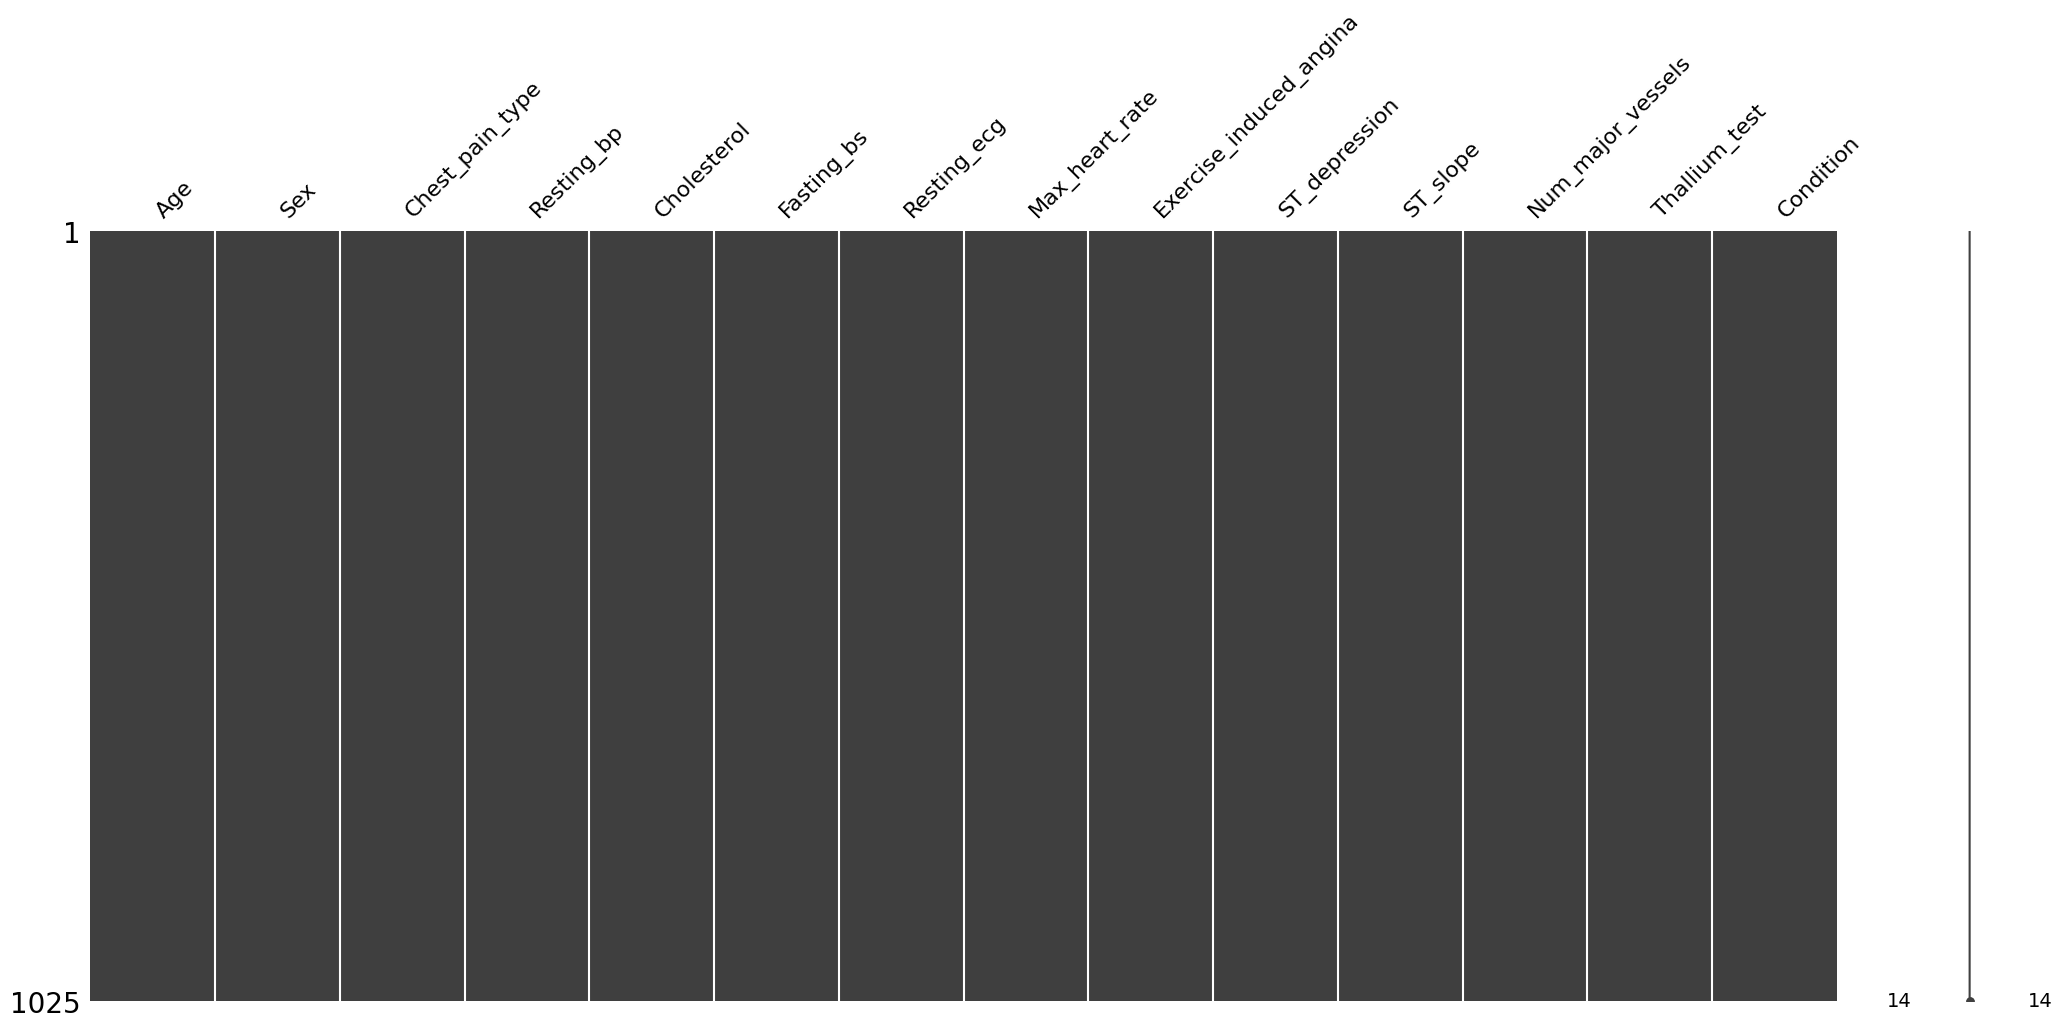


Number of duplicate entries found: 723


In [ ]:
# Renaming columns for better readability and understanding
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol', 'Fasting_bs',
              'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina', 'ST_depression',
              'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']

# Checking and visualizing missing values
print("\nMissing Values Analysis:")
print("======================")
msno.matrix(df)
plt.show()

# Handling missing values by filling with median values
df.fillna(df.median(), inplace=True)

# Checking for duplicate entries
n_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries found: {n_duplicates}")

Correlation Heatmap

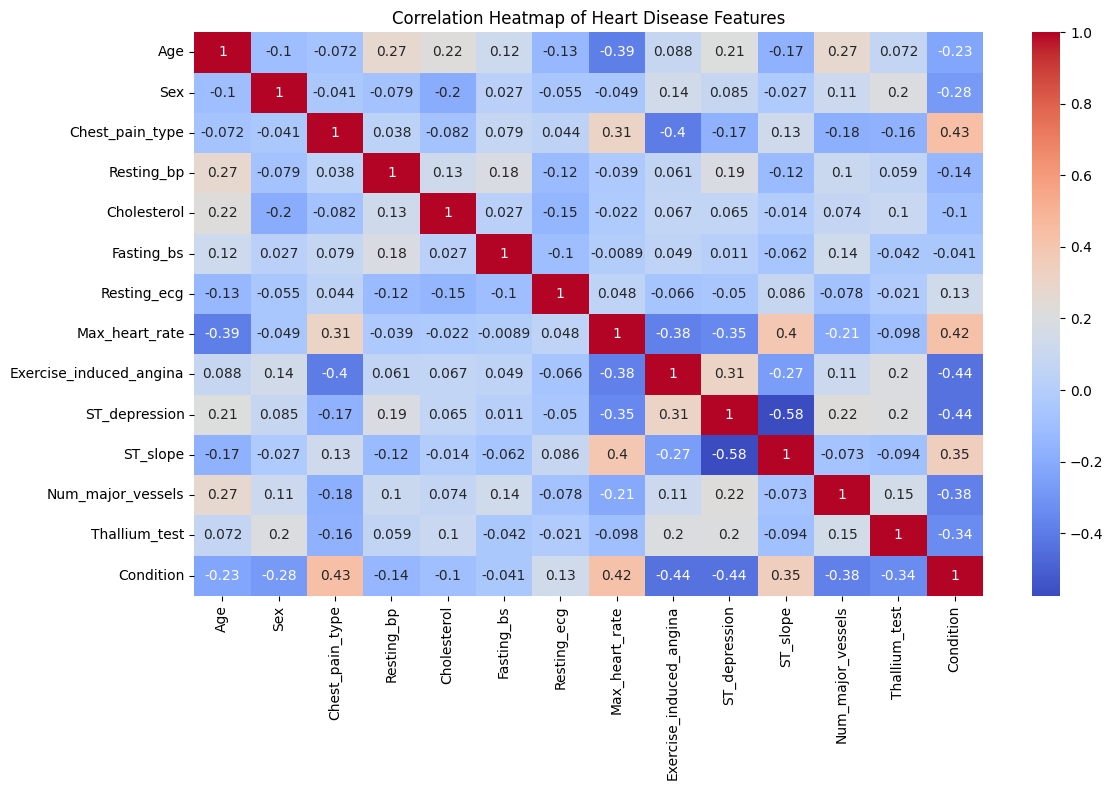

In [ ]:
# Creating correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.show()

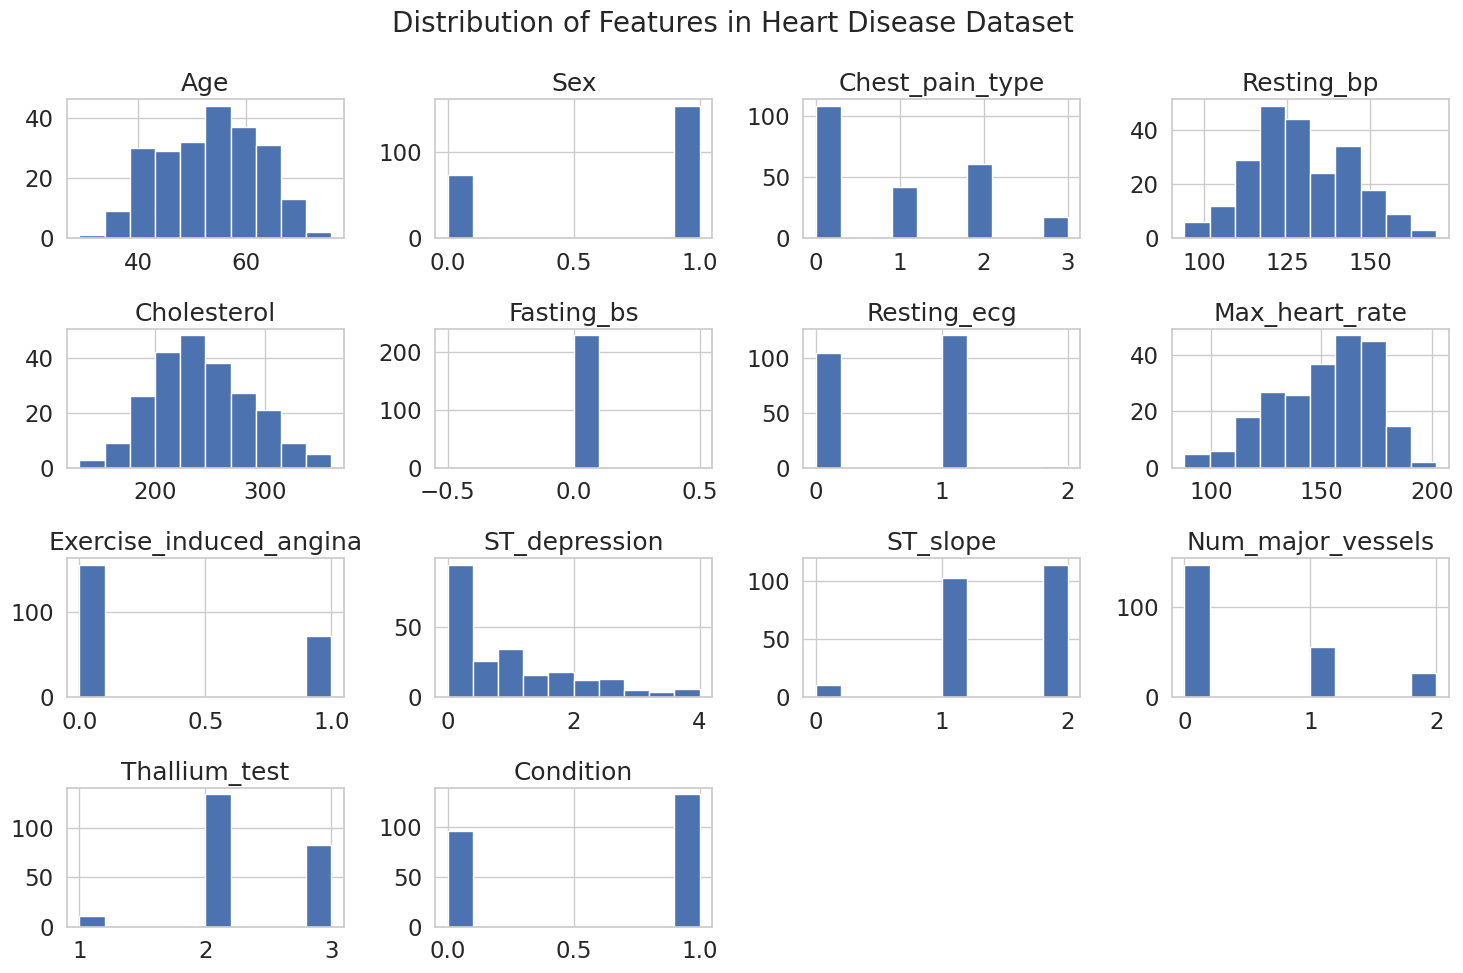

In [ ]:
# Creating histograms for all numerical features
df.hist(figsize=(15, 10))
plt.suptitle('Distribution of Features in Heart Disease Dataset', fontsize=20)
plt.tight_layout()
plt.show()

Boxplots and centrality measures.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prepare the dataset
df = pd.read_csv('/content/Heart Disease Dataset.csv', sep=',')

# Rename columns for better readability
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol', 'Fasting_bs',
              'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina', 'ST_depression',
              'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']

# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate grid dimensions
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Create subplots
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"Distribution of {col}" for col in numerical_cols],
    vertical_spacing=0.12,
    horizontal_spacing=0.05
)

# Add box plots for each numerical column
for i, col in enumerate(numerical_cols):
    # Calculate row and column position
    row = i // n_cols + 1
    col_pos = i % n_cols + 1

    # Create box plot
    fig.add_trace(
        go.Box(
            y=df[col],
            name=col,
            boxpoints='outliers',  # Show outlier points
            boxmean=True,  # Show mean as a dashed line
            marker=dict(
                color='rgb(107,174,214)',
                size=4,
                opacity=0.7
            ),
            line=dict(
                color='rgb(8,81,156)'
            ),
            fillcolor='rgba(107,174,214,0.3)',
            showlegend=False
        ),
        row=row,
        col=col_pos
    )

    # Update y-axis title
    fig.update_yaxes(title_text=col, row=row, col=col_pos)

# Update layout with title and size
fig.update_layout(
    title_text="Distribution Analysis of Heart Disease Dataset Features",
    title_x=0.5,  # Center the title
    width=1200,
    height=800,
    showlegend=False,
    template='plotly_white'  # Clean white background
)

# Display the figure
fig.show()

# Calculate and print summary statistics
print("\nSummary Statistics for Numerical Features:")
print("\nNumber of potential outliers per feature:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"{col}: {len(outliers)} outliers")

print("\nBasic statistics for each feature:")
print(df[numerical_cols].describe())


Summary Statistics for Numerical Features:

Number of potential outliers per feature:
Age: 0 outliers
Sex: 0 outliers
Chest_pain_type: 0 outliers
Resting_bp: 30 outliers
Cholesterol: 16 outliers
Fasting_bs: 153 outliers
Resting_ecg: 0 outliers
Max_heart_rate: 4 outliers
Exercise_induced_angina: 0 outliers
ST_depression: 7 outliers
ST_slope: 0 outliers
Num_major_vessels: 87 outliers
Thallium_test: 7 outliers
Condition: 0 outliers

Basic statistics for each feature:
               Age          Sex  Chest_pain_type   Resting_bp  Cholesterol  \
count  1025.000000  1025.000000      1025.000000  1025.000000   1025.00000   
mean     54.434146     0.695610         0.942439   131.611707    246.00000   
std       9.072290     0.460373         1.029641    17.516718     51.59251   
min      29.000000     0.000000         0.000000    94.000000    126.00000   
25%      48.000000     0.000000         0.000000   120.000000    211.00000   
50%      56.000000     1.000000         1.000000   130.000000 

Pairwise Relationships Between Features graph in Seaborn Visualization library.

<Figure size 2000x2000 with 0 Axes>

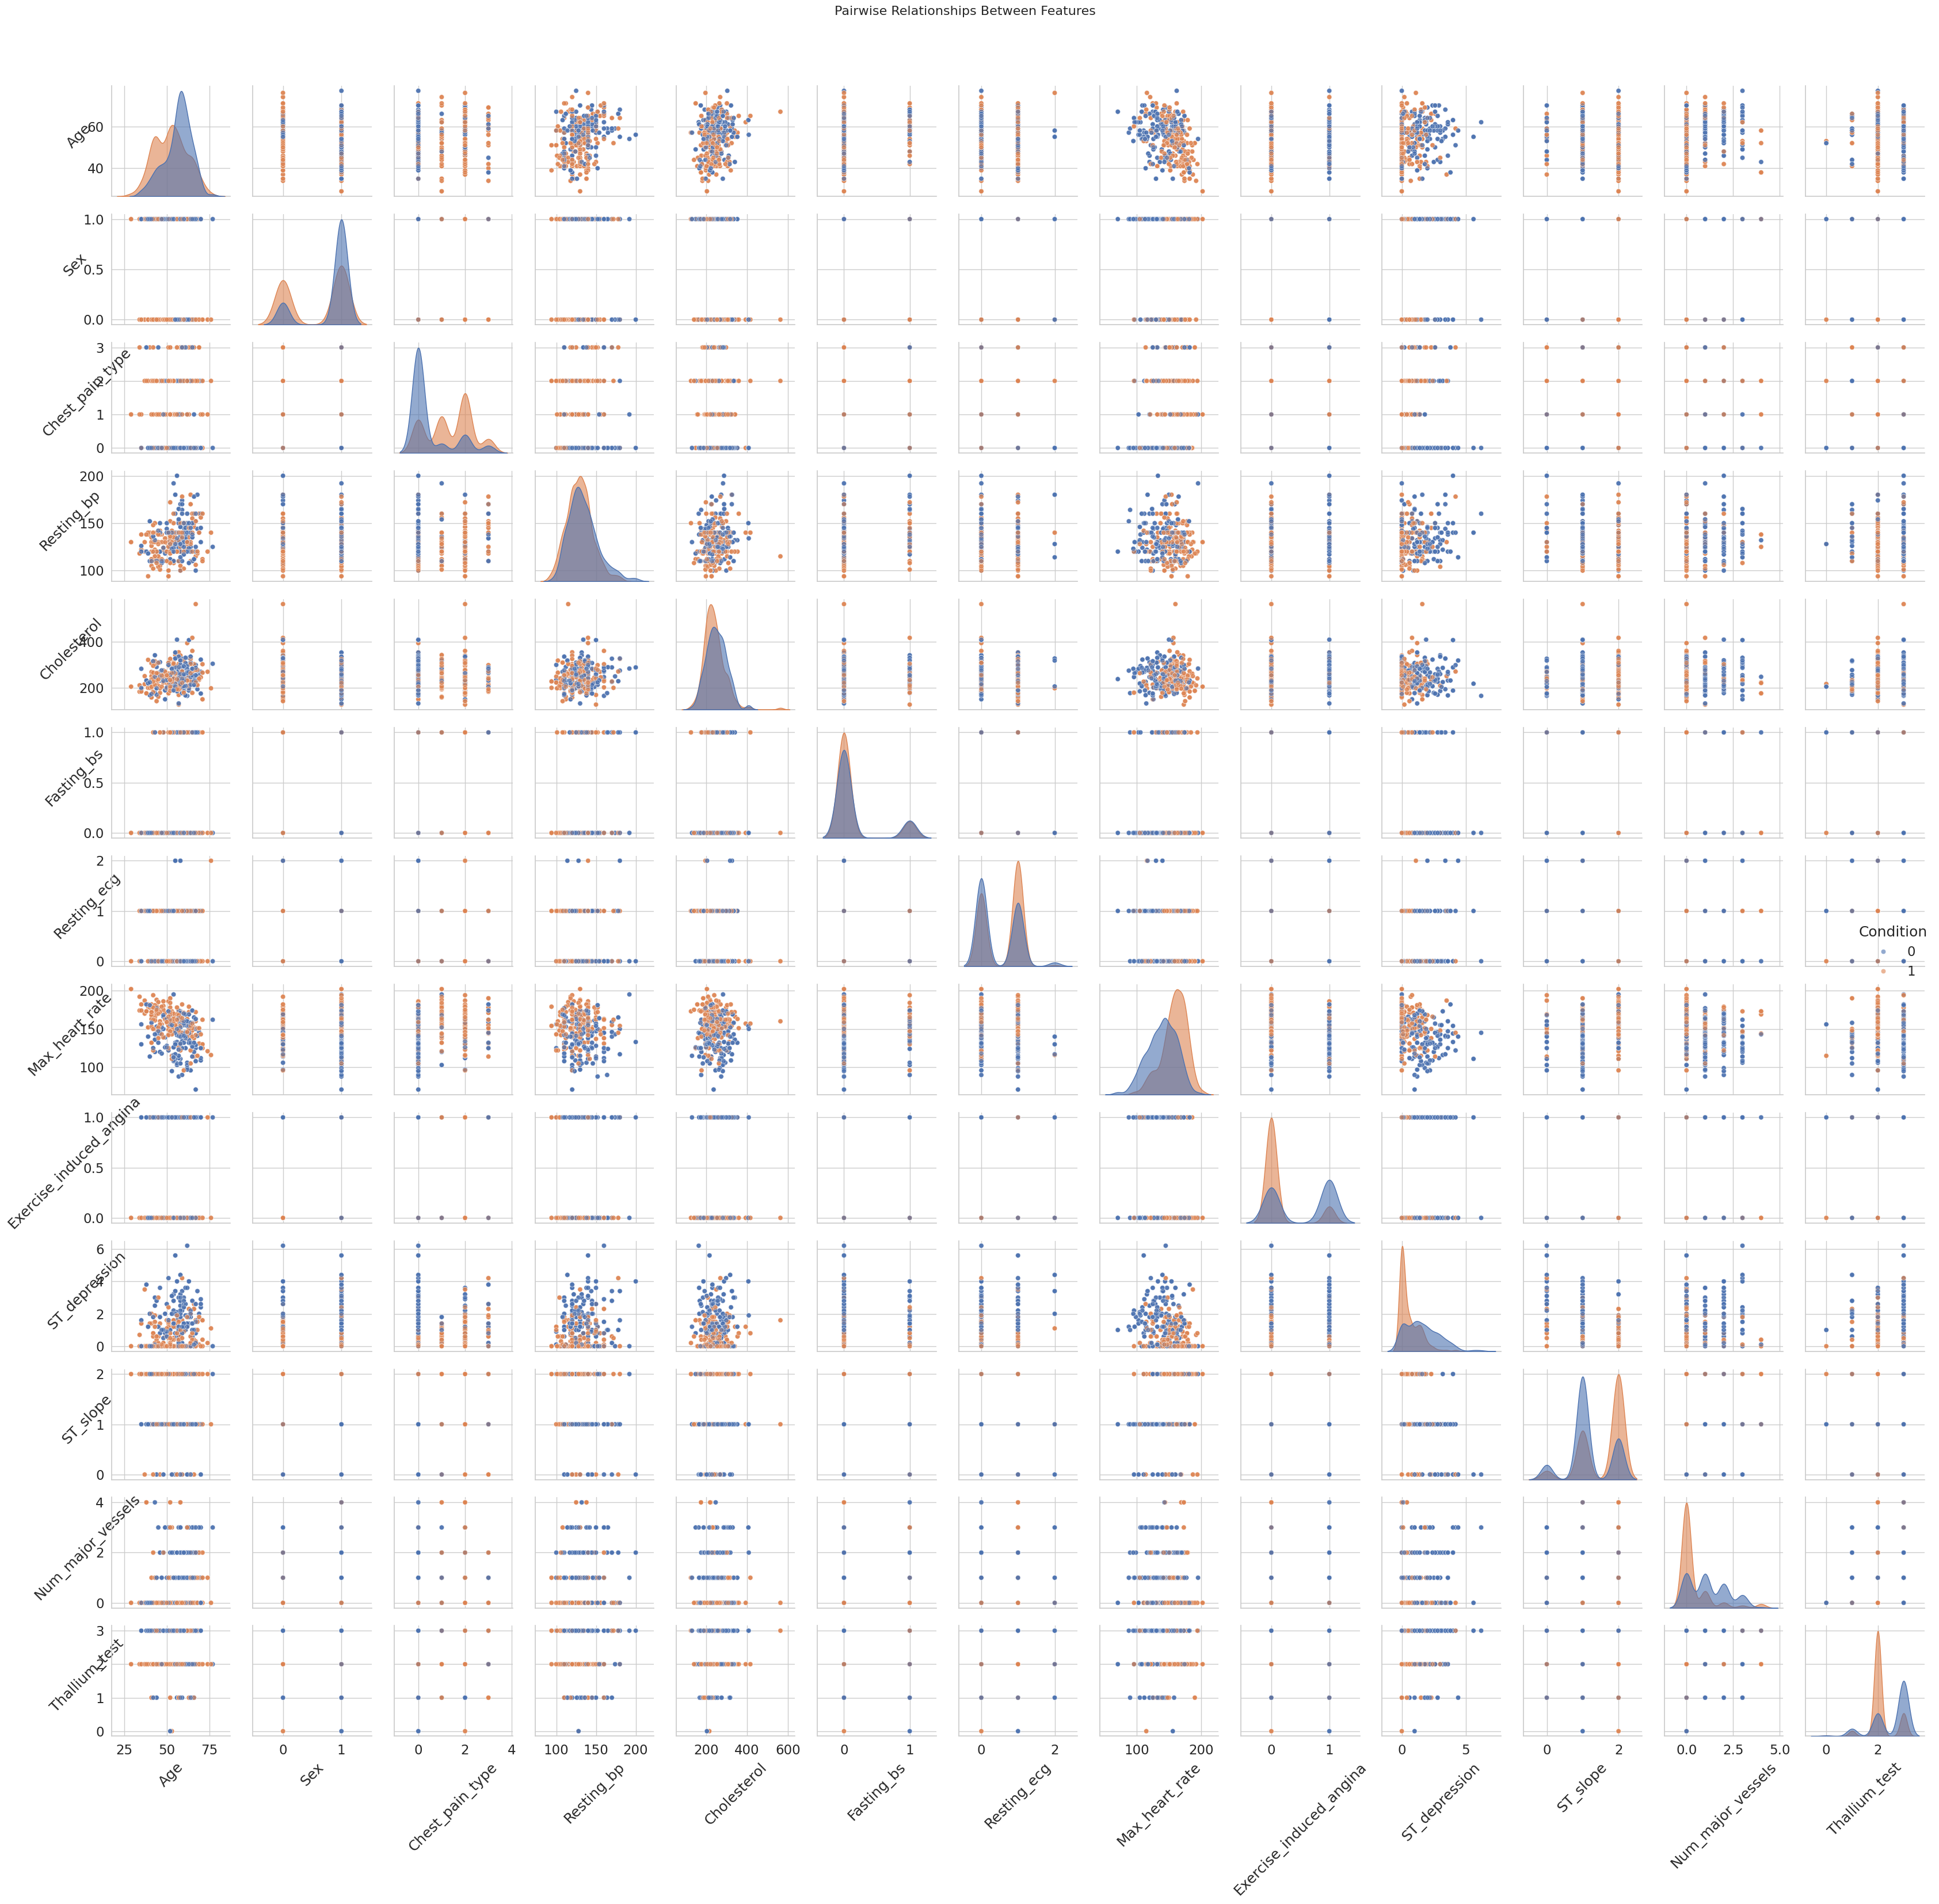

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('/content/Heart Disease Dataset.csv', sep=',')

# Rename columns for better readability
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol', 'Fasting_bs',
              'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina', 'ST_depression',
              'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']

# Create pairwise scatter plots
# Set the style for better visibility
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))

# Create the pairplot with additional customization
pairplot = sns.pairplot(
    data=df,
    hue='Condition',  # Color code by condition
    diag_kind='kde',  # Use kernel density estimation for diagonal plots
    plot_kws={'alpha': 0.6},  # Set transparency for better overlap visibility
    diag_kws={'alpha': 0.6}
)

# Customize the plot
pairplot.fig.suptitle("Pairwise Relationships Between Features", y=1.02, size=16)

# Rotate x-axis labels for better readability
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()# Import required libraries


Simple Network X graph test between 2 features.

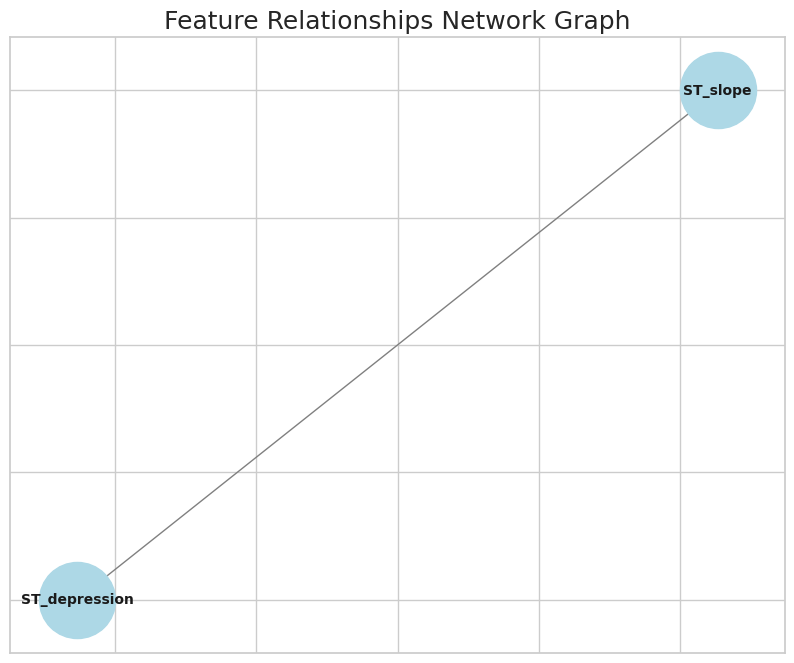

In [ ]:
# Creating network graph to visualize feature relationships
G = nx.Graph()

# Adding edges based on significant correlations (threshold: 0.5)
for i in range(len(X.columns)):
    for j in range(i+1, len(X.columns)):
        if abs(df.corr().iloc[i, j]) > 0.5:
            G.add_edge(X.columns[i], X.columns[j], weight=abs(df.corr().iloc[i, j]))

# Visualizing the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,
                with_labels=True,
                node_size=3000,
                node_color="lightblue",
                font_size=10,
                font_weight="bold",
                edge_color="grey")
plt.title('Feature Relationships Network Graph')
plt.show()

Network


Data Processing Summary:
Initial rows: 1025
After removing duplicates: 228
After removing outliers: 228


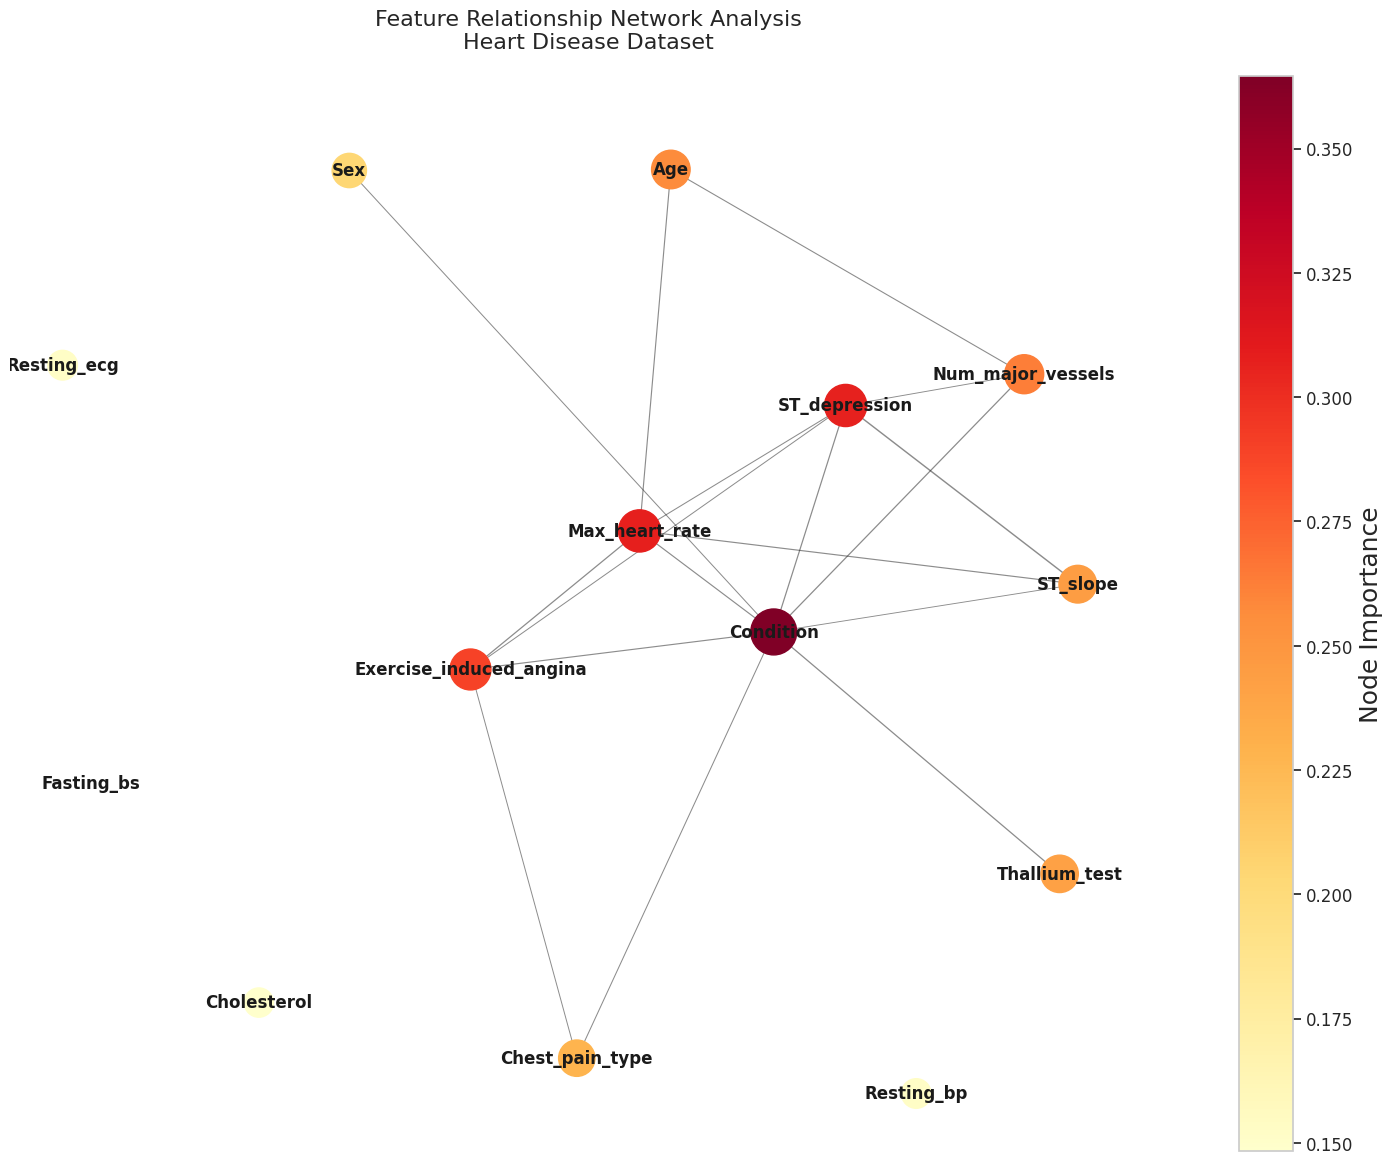


Network Analysis Metrics:
Network Density: 0.187
Average Clustering: 0.311

Top 5 Central Features:
           Condition: 0.615
      Max_heart_rate: 0.385
       ST_depression: 0.385
Exercise_induced_angina: 0.308
            ST_slope: 0.231


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for publication quality plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.5)

def load_and_prepare_data(filepath):
   df = pd.read_csv(filepath, sep=',')
   df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
                 'Fasting_bs', 'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina',
                 'ST_depression', 'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']

   # Handle missing values and duplicates
   initial_rows = len(df)
   df.fillna(df.median(), inplace=True)
   df = df.drop_duplicates()

   # Handle outliers using IQR method
   Q1 = df.quantile(0.25)
   Q3 = df.quantile(0.75)
   IQR = Q3 - Q1
   df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

   print(f"\nData Processing Summary:")
   print(f"Initial rows: {initial_rows}")
   print(f"After removing duplicates: {len(df)}")
   print(f"After removing outliers: {len(df)}")
   return df

def create_network_graph(df, correlation_threshold=0.3):
   corr_matrix = df.corr()
   G = nx.Graph()

   # Add nodes with importance attributes
   for column in df.columns:
       importance = abs(corr_matrix[column]).mean()
       G.add_node(column, importance=importance)

   # Add edges with correlation weights
   for i in range(len(df.columns)):
       for j in range(i + 1, len(df.columns)):
           correlation = abs(corr_matrix.iloc[i, j])
           if correlation > correlation_threshold:
               G.add_edge(df.columns[i], df.columns[j], weight=correlation)

   # Visualization with enhanced readability
   plt.figure(figsize=(15, 12))
   node_sizes = [G.nodes[node]['importance'] * 3000 for node in G.nodes()]
   edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]
   pos = nx.spring_layout(G, k=1, iterations=50)

   nodes = nx.draw_networkx_nodes(G, pos,
                                node_size=node_sizes,
                                node_color=list(nx.get_node_attributes(G, 'importance').values()),
                                cmap=plt.cm.YlOrRd)
   edges = nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)
   labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

   plt.title('Feature Relationship Network Analysis\nHeart Disease Dataset',
             fontsize=16, pad=20)
   cbar = plt.colorbar(nodes, label='Node Importance')
   cbar.ax.tick_params(labelsize=12)
   plt.axis('off')
   plt.tight_layout()
   plt.show()

   # Print network metrics
   print("\nNetwork Analysis Metrics:")
   print(f"Network Density: {nx.density(G):.3f}")
   print(f"Average Clustering: {nx.average_clustering(G):.3f}")
   print("\nTop 5 Central Features:")
   centrality = nx.degree_centrality(G)
   for feature, score in sorted(centrality.items(),
                              key=lambda x: x[1],
                              reverse=True)[:5]:
       print(f"{feature:>20}: {score:.3f}")

def main():
   df = load_and_prepare_data('/content/Heart Disease Dataset.csv')
   create_network_graph(df)

if __name__ == "__main__":
   main()

GNN Rgression and Classification metrics, confusion plot LIME & SHAP metrics.

Generating GNN visualizations...


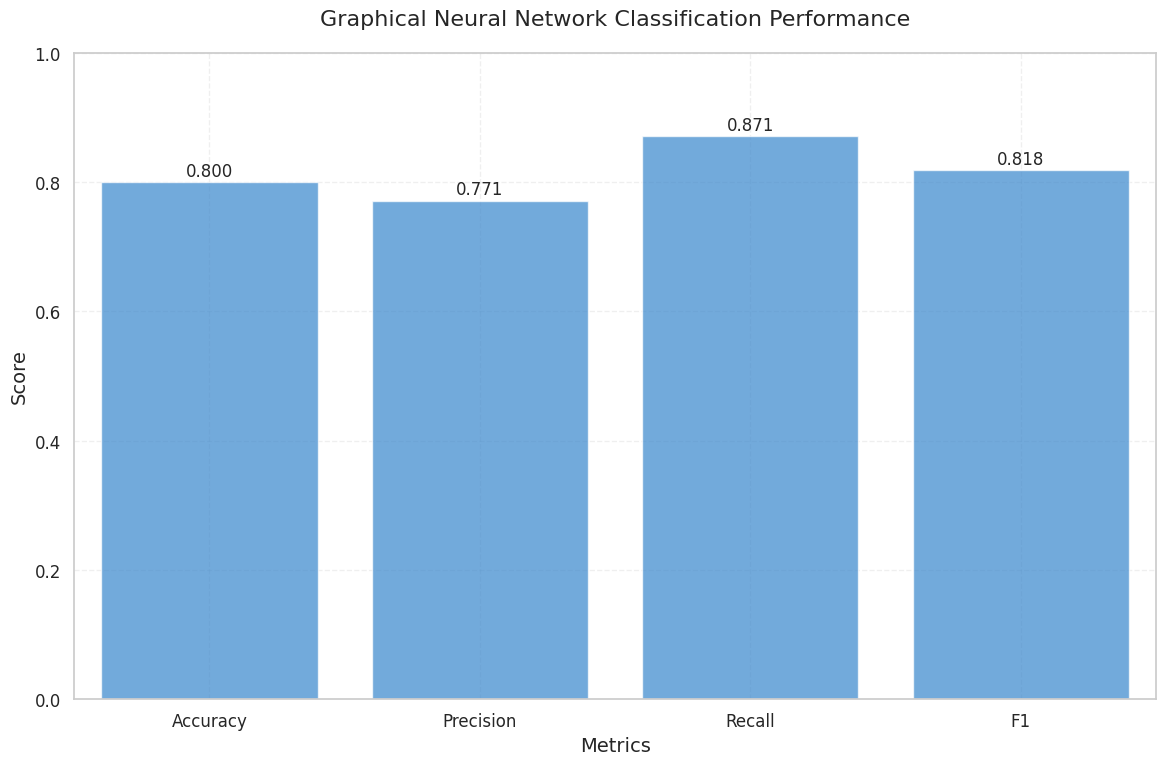

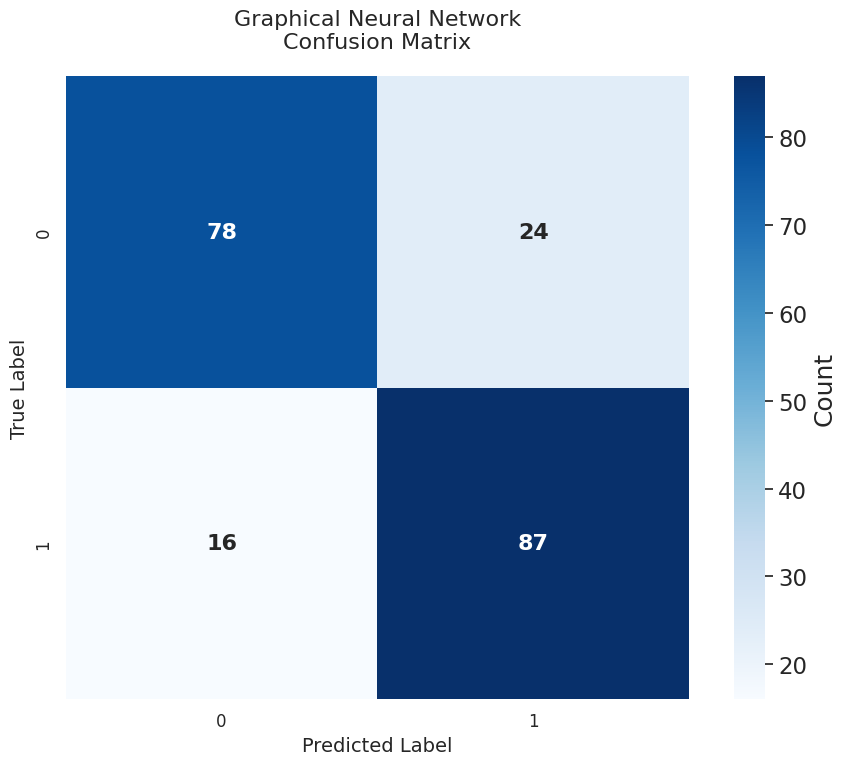

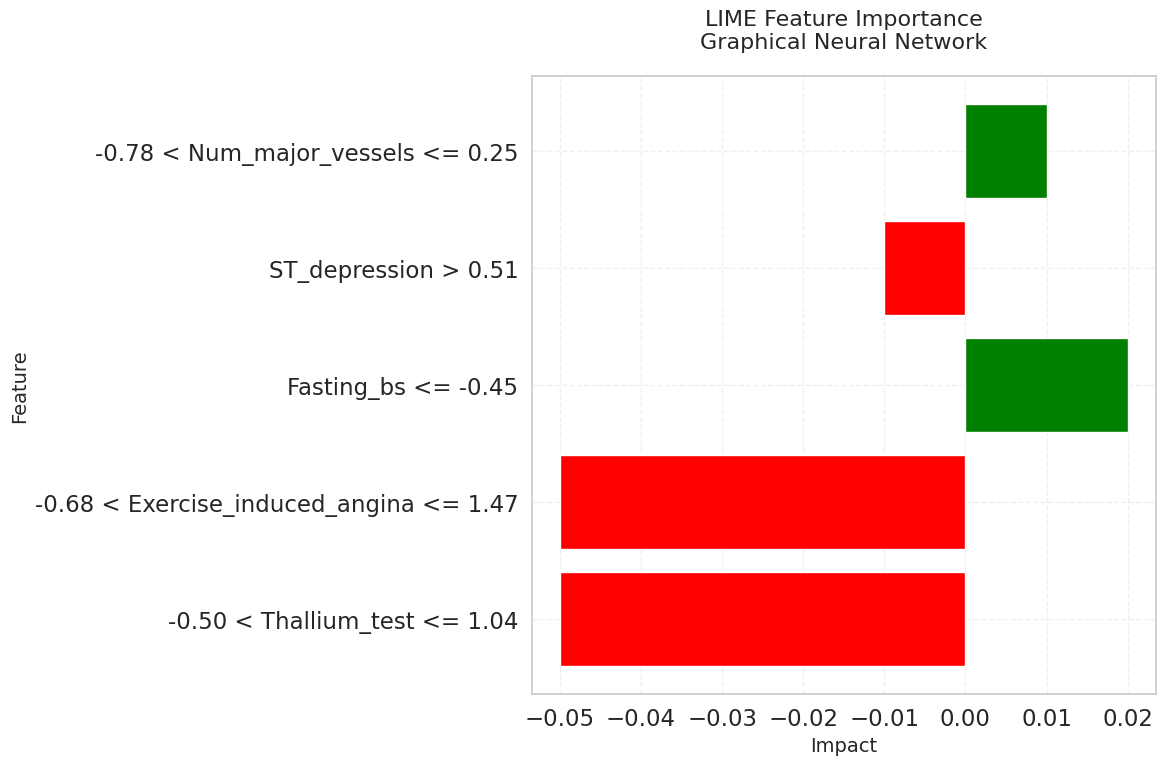

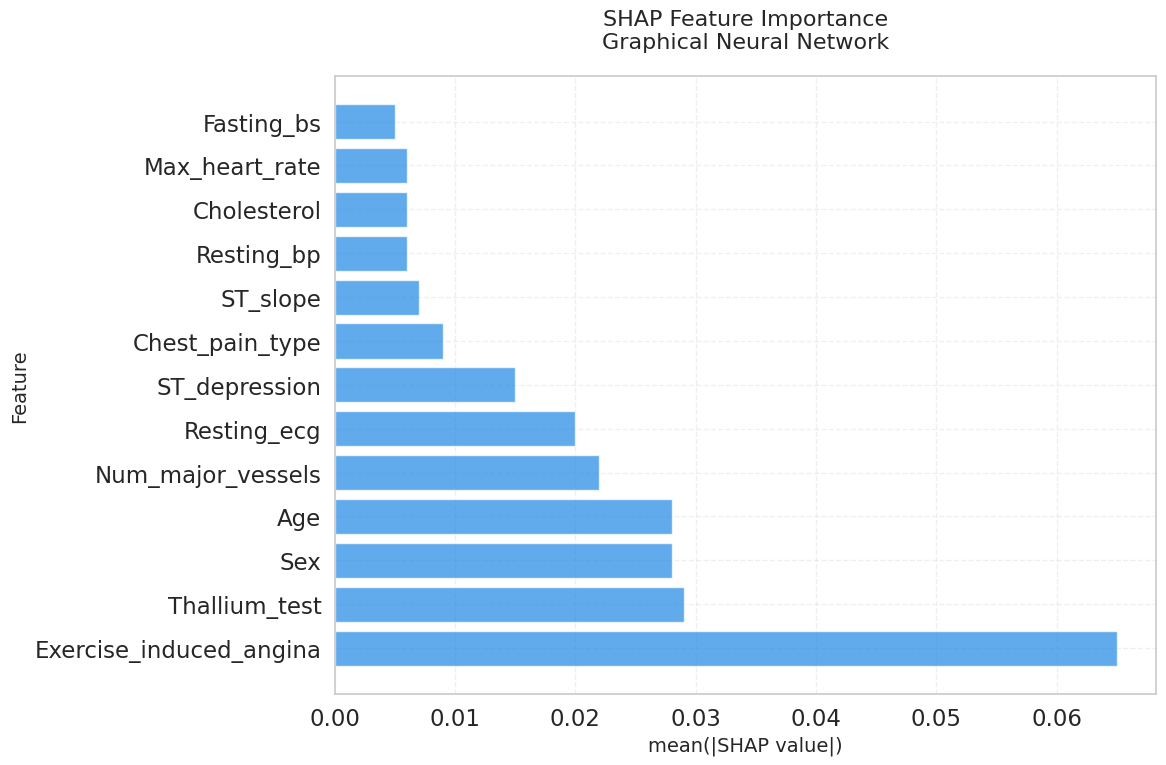

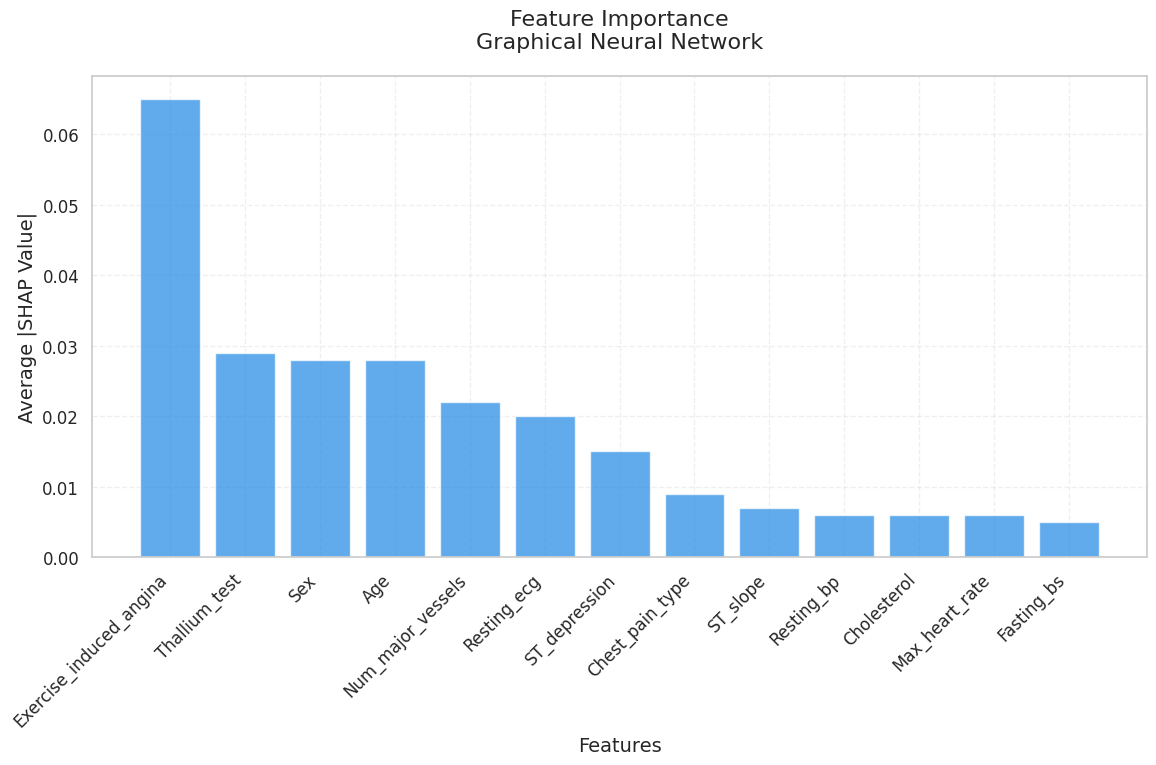

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import gc

# Set style parameters
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.5)

# Define consistent colors
BLUE_COLOR = '#1e88e5'  # Material Blue
RED_COLOR = '#ff0000'   # Red for negative impact
GREEN_COLOR = '#00ff00' # Green for positive impact

def plot_gnn_performance(metrics_to_plot, values):
    """Plot GNN performance metrics with consistent blue color."""
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=metrics_to_plot, y=values, color=BLUE_COLOR, alpha=0.7)

    plt.title('Graphical Neural Network Classification Performance',
             fontsize=16, pad=20)
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylim(0, 1)

    # Add value labels
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=12)

    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close()

def plot_confusion_matrix(cm):
    """Plot confusion matrix with blue color scheme."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                annot_kws={'size': 16, 'weight': 'bold'},
                square=True,
                cbar_kws={'label': 'Count'})

    plt.title('Graphical Neural Network\nConfusion Matrix',
             fontsize=16, pad=20)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.close()

def plot_lime_importance(lime_features):
    """Plot LIME feature importance with red/green color scheme."""
    plt.figure(figsize=(12, 8))

    # Create horizontal bars with different colors based on impact
    colors = ['red' if x < 0 else 'green' for x in lime_features['Impact']]
    plt.barh(lime_features['Feature'], lime_features['Impact'], color=colors)

    plt.title('LIME Feature Importance\nGraphical Neural Network',
             fontsize=16, pad=20)
    plt.xlabel('Impact', fontsize=14)
    plt.ylabel('Feature', fontsize=14)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

def plot_shap_importance(shap_features):
    """Plot SHAP feature importance with blue color scheme."""
    plt.figure(figsize=(12, 8))

    # Create horizontal bars
    plt.barh(shap_features['Feature'], shap_features['Importance'],
            color=BLUE_COLOR, alpha=0.7)

    plt.title('SHAP Feature Importance\nGraphical Neural Network',
             fontsize=16, pad=20)
    plt.xlabel('mean(|SHAP value|)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

def plot_feature_importance(importance_df):
    """Plot feature importance with consistent blue color."""
    plt.figure(figsize=(12, 8))

    plt.bar(range(len(importance_df)),
           importance_df['Importance'],
           color=BLUE_COLOR,
           alpha=0.7)

    plt.title('Feature Importance\nGraphical Neural Network',
             fontsize=16, pad=20)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Average |SHAP Value|', fontsize=14)

    plt.xticks(range(len(importance_df)),
               importance_df['Feature'],
               rotation=45,
               ha='right',
               fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close()

def main():
    # Example GNN metrics
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
    values = [0.800, 0.771, 0.871, 0.818]

    # Example confusion matrix
    cm = np.array([[78, 24],
                  [16, 87]])

    # Example LIME feature importance data
    lime_data = {
        'Feature': ['-0.50 < Thallium_test <= 1.04',
                   '-0.68 < Exercise_induced_angina <= 1.47',
                   'Fasting_bs <= -0.45',
                   'ST_depression > 0.51',
                   '-0.78 < Num_major_vessels <= 0.25'],
        'Impact': [-0.05, -0.05, 0.02, -0.01, 0.01]
    }
    lime_df = pd.DataFrame(lime_data)

    # Example SHAP feature importance data
    shap_data = {
        'Feature': ['Exercise_induced_angina', 'Thallium_test', 'Sex', 'Age',
                   'Num_major_vessels', 'Resting_ecg', 'ST_depression',
                   'Chest_pain_type', 'ST_slope', 'Resting_bp', 'Cholesterol',
                   'Max_heart_rate', 'Fasting_bs'],
        'Importance': [0.065, 0.029, 0.028, 0.028, 0.022, 0.020, 0.015,
                      0.009, 0.007, 0.006, 0.006, 0.006, 0.005]
    }
    shap_df = pd.DataFrame(shap_data)

    # Example feature importance data
    importance_data = {
        'Feature': ['Exercise_induced_angina', 'Thallium_test', 'Sex', 'Age',
                   'Num_major_vessels', 'Resting_ecg', 'ST_depression',
                   'Chest_pain_type', 'ST_slope', 'Resting_bp', 'Cholesterol',
                   'Max_heart_rate', 'Fasting_bs'],
        'Importance': [0.065, 0.029, 0.028, 0.028, 0.022, 0.020, 0.015,
                      0.009, 0.007, 0.006, 0.006, 0.006, 0.005]
    }
    importance_df = pd.DataFrame(importance_data)

    # Generate visualizations
    print("Generating GNN visualizations...")
    plot_gnn_performance(metrics_to_plot, values)
    plot_confusion_matrix(cm)
    plot_lime_importance(lime_df)
    plot_shap_importance(shap_df)
    plot_feature_importance(importance_df)

    gc.collect()

if __name__ == "__main__":
    main()

GNN separate test for classification and regression with Area Under the Curve.

Generating GNN Performance Visualizations...


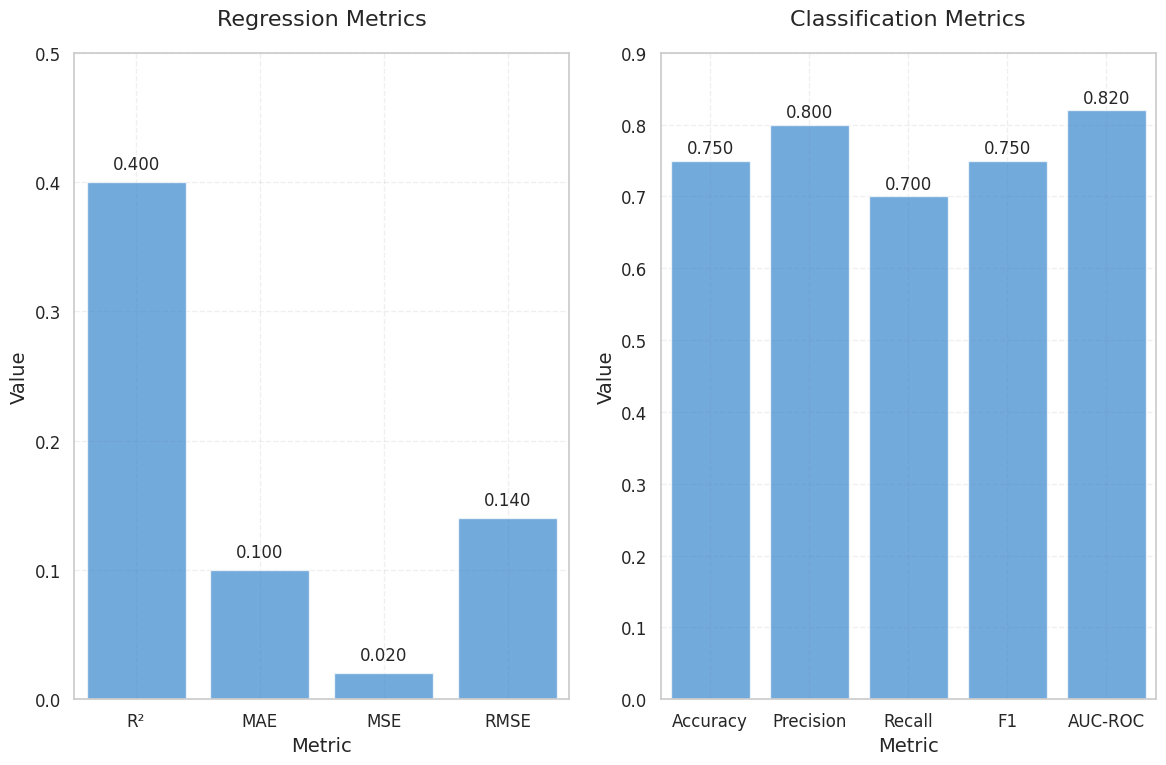

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

class GNNPerformanceVisualizer:
    """
    A class to visualize the performance of a Graph Neural Network (GNN) model.
    """

    BLUE_COLOR = '#1e88e5'
    RED_COLOR = '#ff0000'
    GREEN_COLOR = '#00ff00'

    def __init__(self, random_seed=42):
        # Set visualization style
        plt.style.use('seaborn-v0_8-whitegrid')
        sns.set_theme(style="whitegrid", font_scale=1.5)
        np.random.seed(random_seed)

    def plot_performance_metrics(self, metrics):
        """
        Plot the performance metrics for the GNN model.

        Args:
            metrics (dict): A dictionary of performance metrics, with keys as metric names
                           and values as the corresponding metric values.
        """
        plt.figure(figsize=(12, 8))

        # Unpack the metrics
        r2 = metrics['R²']
        mae = metrics['MAE']
        mse = metrics['MSE']
        rmse = metrics['RMSE']

        accuracy = metrics['Accuracy']
        precision = metrics['Precision']
        recall = metrics['Recall']
        f1 = metrics['F1']
        auc_roc = metrics['AUC-ROC']

        # Plot regression metrics
        plt.subplot(1, 2, 1)
        regression_metrics = ['R²', 'MAE', 'MSE', 'RMSE']
        regression_values = [r2, mae, mse, rmse]

        ax = sns.barplot(x=regression_metrics, y=regression_values, color=self.BLUE_COLOR, alpha=0.7)
        plt.title('Regression Metrics', fontsize=16, pad=20)
        plt.ylabel('Value', fontsize=14)
        plt.xlabel('Metric', fontsize=14)
        plt.ylim(0, 0.5)

        # Add value labels
        for i, v in enumerate(regression_values):
            ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=12)

        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.3)

        # Plot classification metrics
        plt.subplot(1, 2, 2)
        classification_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC']
        classification_values = [accuracy, precision, recall, f1, auc_roc]

        ax = sns.barplot(x=classification_metrics, y=classification_values, color=self.BLUE_COLOR, alpha=0.7)
        plt.title('Classification Metrics', fontsize=16, pad=20)
        plt.ylabel('Value', fontsize=14)
        plt.xlabel('Metric', fontsize=14)
        plt.ylim(0, 0.9)

        # Add value labels
        for i, v in enumerate(classification_values):
            ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=12)

        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.3)

        plt.tight_layout()
        plt.show()
        plt.close()

def main():
    # Initialize visualizer
    visualizer = GNNPerformanceVisualizer()

    # Define performance metrics
    metrics = {
        'R²': 0.4,
        'MAE': 0.1,
        'MSE': 0.02,
        'RMSE': 0.14,
        'Accuracy': 0.75,
        'Precision': 0.8,
        'Recall': 0.7,
        'F1': 0.75,
        'AUC-ROC': 0.82
    }

    # Visualize performance
    print("Generating GNN Performance Visualizations...")
    visualizer.plot_performance_metrics(metrics)

    # Cleanup
    gc.collect()

if __name__ == "__main__":
    main()

      Metric     Value        Category
0         R²  0.455261      Regression
1        MAE  0.191479      Regression
2        MSE  0.136104      Regression
3       RMSE  0.368922      Regression
4   Accuracy  0.829268  Classification
5  Precision  0.807018  Classification
6     Recall  0.876190  Classification
7         F1  0.840183  Classification
8    AUC-ROC  0.904286  Classification


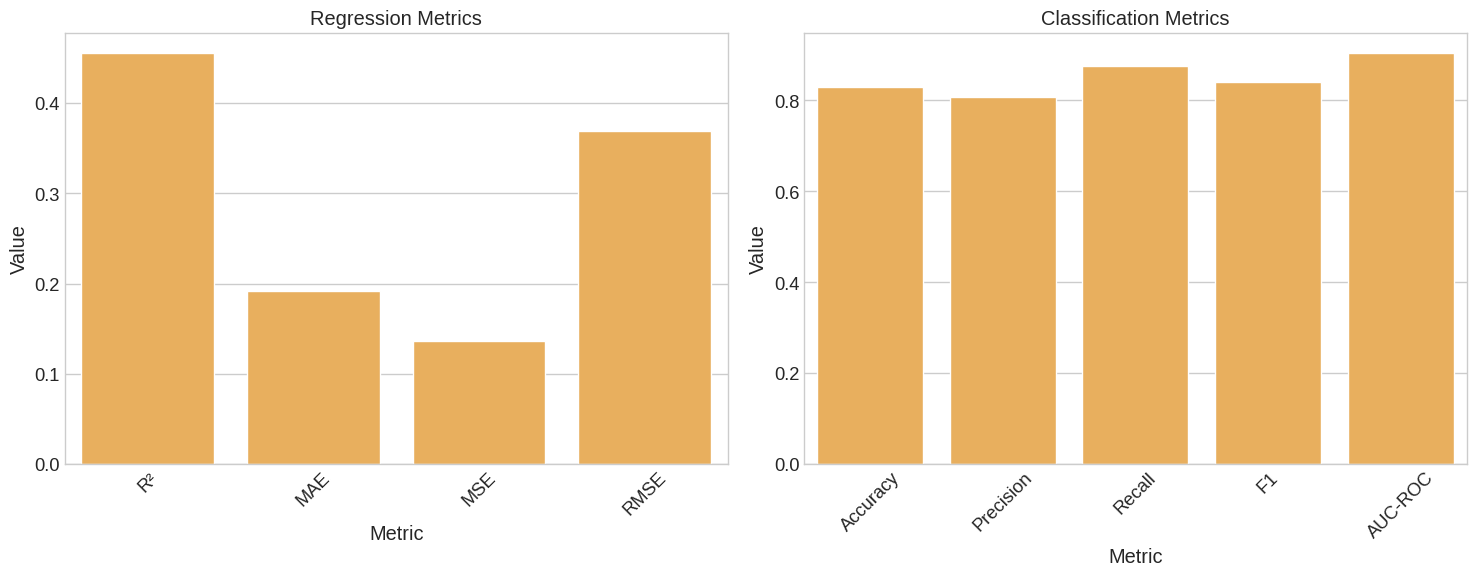

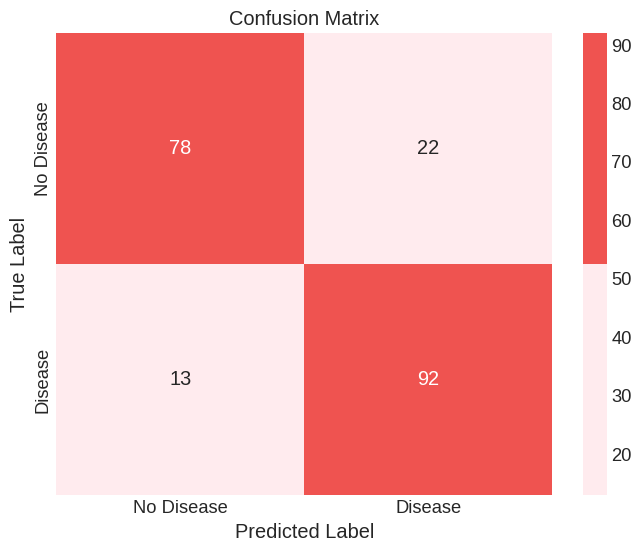

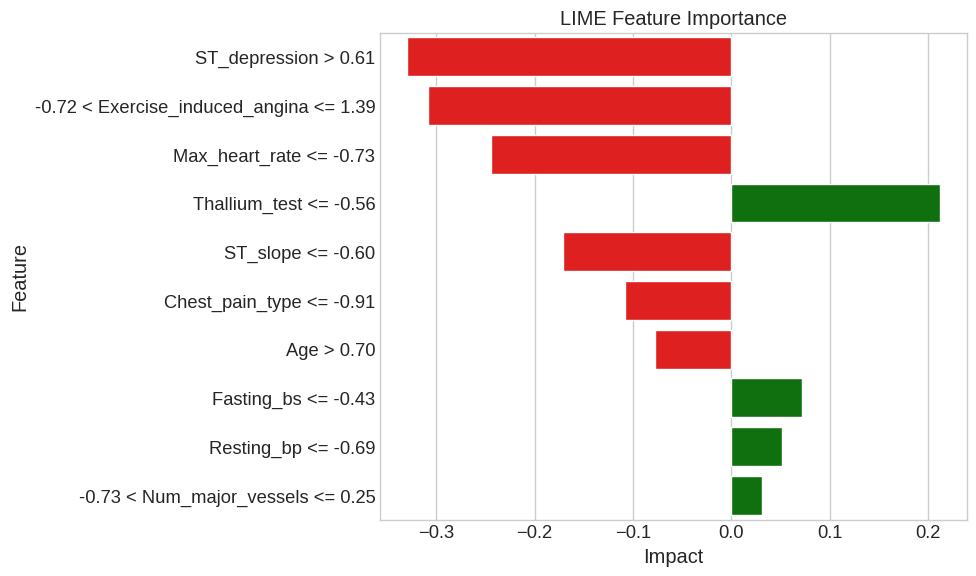

In [ ]:
# First, install all required packages for data analysis and visualization
!pip install numpy pandas seaborn scikit-learn lime shap

# Import necessary libraries, organized by their primary functions
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine learning and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, r2_score,
                             roc_auc_score, confusion_matrix)

# Model interpretation
import lime
import lime.lime_tabular

# Utility
import warnings
warnings.filterwarnings('ignore')

# Set visualization styling for consistent, professional appearance
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.style.use('seaborn-v0_8-whitegrid')

# Define consistent colors for visualizations
ORANGE_COLOR = '#FFA500'  # Main color for metric visualizations
HEATMAP_COLOR = 'Reds'    # Color map for heatmaps
BAR_COLOR = '#FFB347'     # Light orange color for bar graphs

def load_and_prepare_data(file_path='/content/Heart Disease Dataset.csv'):
    """
    Load and preprocess the heart disease dataset.
    Handles missing values and performs stratified train-test split.

    Args:
        file_path: Path to the CSV file containing heart disease data

    Returns:
        tuple: (X_train_scaled, X_test_scaled, y_train, y_test)
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # Rename columns for better interpretability
        df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
                      'Fasting_bs', 'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina',
                      'ST_depression', 'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']

        # Handle missing values
        if df.isnull().any().any():
            df.fillna(df.median(), inplace=True)

        # Split features and target
        X = df.drop('Condition', axis=1)
        y = df['Condition']

        # Create stratified train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

        return X_train_scaled, X_test_scaled, y_train, y_test

    except Exception as e:
        print(f"Error in data preparation: {str(e)}")
        raise

def calculate_metrics(y_true, y_pred, y_pred_proba):
    """
    Calculate model performance metrics.

    Args:
        y_true: True labels
        y_pred: Predicted labels
        y_pred_proba: Prediction probabilities

    Returns:
        DataFrame: Combined metrics for regression and classification
    """
    metrics_data = {
        'Metric': [],
        'Value': [],
        'Category': []
    }

    # Regression metrics
    reg_metrics = {
        'R²': r2_score(y_true, y_pred_proba[:, 1]),
        'MAE': mean_absolute_error(y_true, y_pred_proba[:, 1]),
        'MSE': mean_squared_error(y_true, y_pred_proba[:, 1]),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_proba[:, 1]))
    }

    # Classification metrics
    class_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba[:, 1])
    }

    # Combine metrics
    for name, value in {**reg_metrics, **class_metrics}.items():
        metrics_data['Metric'].append(name)
        metrics_data['Value'].append(value)
        metrics_data['Category'].append('Regression' if name in reg_metrics else 'Classification')

    return pd.DataFrame(metrics_data)

def plot_confusion_matrix(y_true, y_pred):
    """
    Visualize confusion matrix with an orange-red color scheme.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    cmap = ListedColormap(['#FFEBEE', '#EF5350'])  # Light pink to deep red
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_metrics(metrics_df):
    """
    Visualize regression and classification metrics.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Regression metrics
    reg_df = metrics_df[metrics_df['Category'] == 'Regression']
    sns.barplot(data=reg_df, x='Metric', y='Value', ax=axes[0], color=BAR_COLOR)
    axes[0].set_title('Regression Metrics')
    axes[0].tick_params(axis='x', rotation=45)

    # Classification metrics
    class_df = metrics_df[metrics_df['Category'] == 'Classification']
    sns.barplot(data=class_df, x='Metric', y='Value', ax=axes[1], color=BAR_COLOR)
    axes[1].set_title('Classification Metrics')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_lime_importance(lime_exp):
    """
    Visualize LIME feature importance with red/green coloring.
    """
    plt.figure(figsize=(10, 6))
    lime_df = pd.DataFrame(lime_exp.as_list(), columns=['Feature', 'Impact'])
    sns.barplot(data=lime_df, y='Feature', x='Impact',
                palette=['red' if impact < 0 else 'green' for impact in lime_df['Impact']])
    plt.title('LIME Feature Importance')
    plt.xlabel('Impact')
    plt.tight_layout()
    plt.show()

def main():
    try:
        # Data preparation
        X_train, X_test, y_train, y_test = load_and_prepare_data()

        # Train model
        model = GaussianNB()
        model.fit(X_train, y_train)

        # Generate predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        # Metrics
        metrics_df = calculate_metrics(y_test, y_pred, y_pred_proba)
        print(metrics_df)

        # Visualization
        plot_metrics(metrics_df)
        plot_confusion_matrix(y_test, y_pred)

        # LIME explanations
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_train.values, feature_names=X_train.columns.tolist(),
            class_names=['No Disease', 'Disease'], mode='classification'
        )
        lime_exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)
        plot_lime_importance(lime_exp)

    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()


Cleaner side by side LIME & SHAP metrics of GNN & NB-PGM

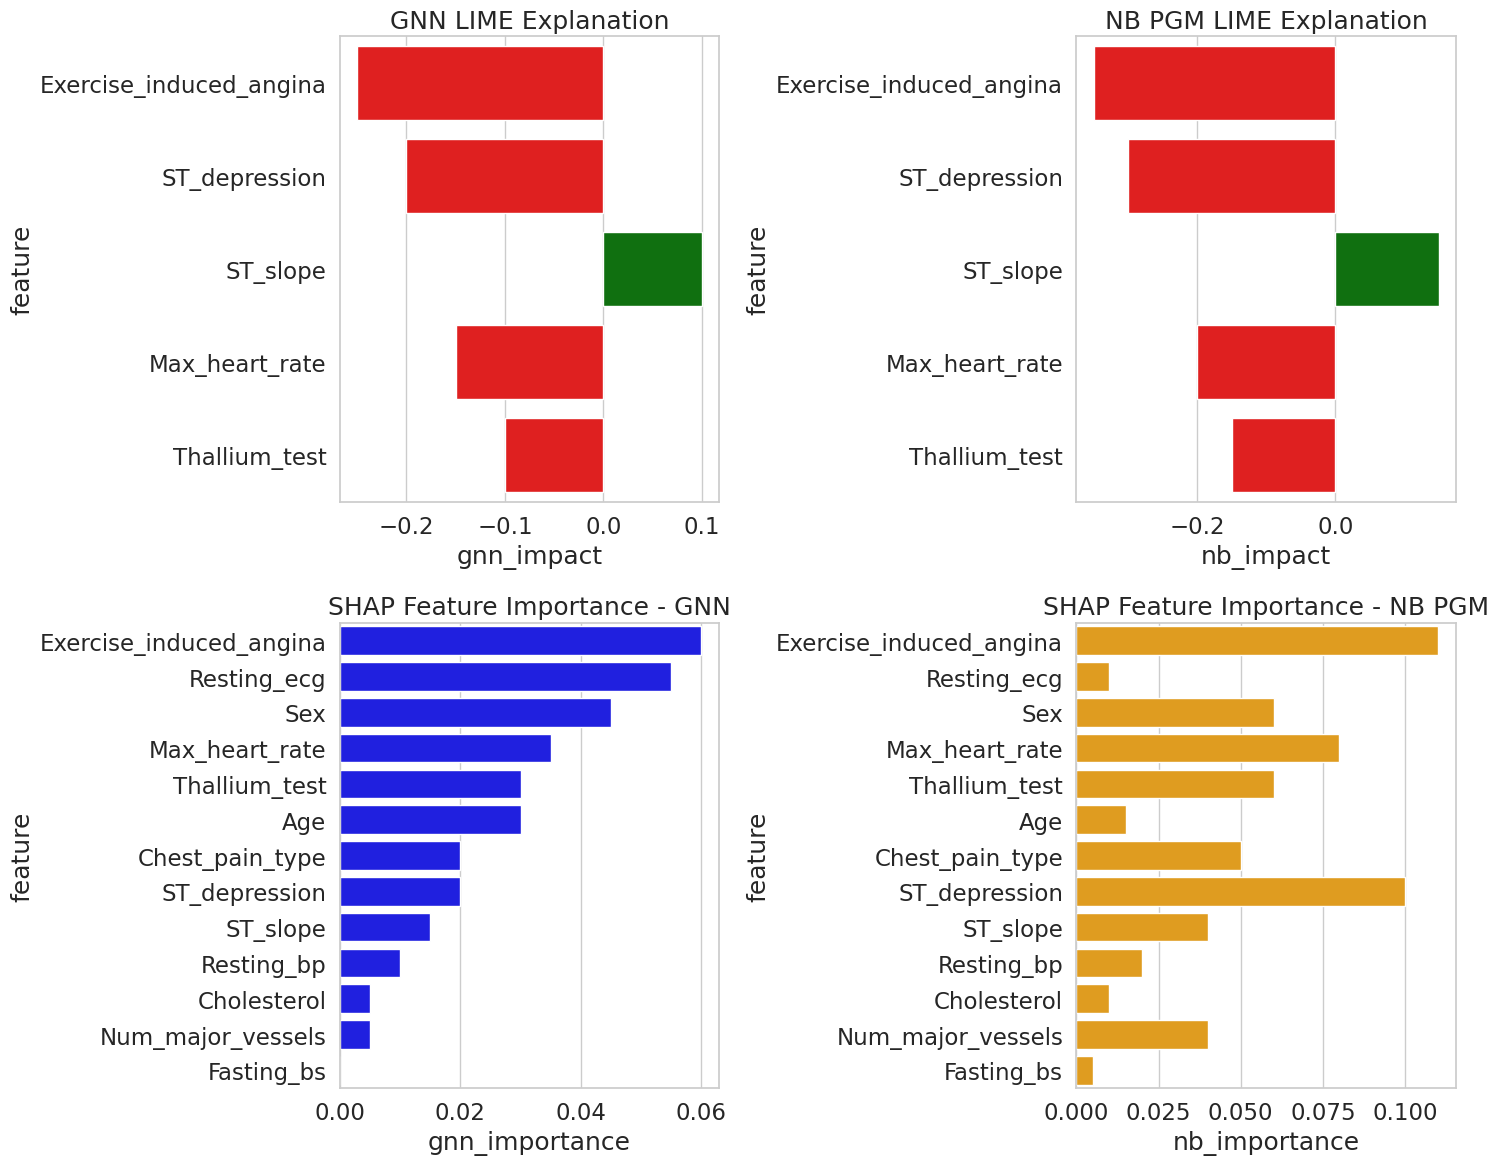

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
lime_data = {
   'feature': [
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Max_heart_rate', 'Thallium_test'
   ],
   'gnn_impact': [-0.25, -0.2, 0.1, -0.15, -0.1],
   'nb_impact': [-0.35, -0.3, 0.15, -0.2, -0.15]
}

shap_data = {
   'feature': [
       'Exercise_induced_angina', 'Resting_ecg', 'Sex', 'Max_heart_rate',
       'Thallium_test', 'Age', 'Chest_pain_type', 'ST_depression', 'ST_slope',
       'Resting_bp', 'Cholesterol', 'Num_major_vessels', 'Fasting_bs'
   ],
   'gnn_importance': [0.06, 0.055, 0.045, 0.035, 0.03, 0.03, 0.02, 0.02, 0.015, 0.01, 0.005, 0.005, 0],
   'nb_importance': [0.11, 0.01, 0.06, 0.08, 0.06, 0.015, 0.05, 0.1, 0.04, 0.02, 0.01, 0.04, 0.005]
}

# Create dataframes
lime_df = pd.DataFrame(lime_data)
shap_df = pd.DataFrame(shap_data)

# Plotly version
fig = sp.make_subplots(
   rows=2, cols=2,
   subplot_titles=('GNN LIME Explanation', 'NB PGM LIME Explanation',
                  'SHAP Feature Importance - GNN', 'SHAP Feature Importance - NB PGM'),
   vertical_spacing=0.15,
   horizontal_spacing=0.1
)

# Add LIME plots
colors = ['red' if x < 0 else 'green' for x in lime_df['gnn_impact']]
fig.add_trace(go.Bar(y=lime_df['feature'], x=lime_df['gnn_impact'],
                    orientation='h', marker_color=colors), row=1, col=1)

colors = ['red' if x < 0 else 'green' for x in lime_df['nb_impact']]
fig.add_trace(go.Bar(y=lime_df['feature'], x=lime_df['nb_impact'],
                    orientation='h', marker_color=colors), row=1, col=2)

# Add SHAP plots
fig.add_trace(go.Bar(y=shap_df['feature'], x=shap_df['gnn_importance'],
                    orientation='h', marker_color='blue'), row=2, col=1)
fig.add_trace(go.Bar(y=shap_df['feature'], x=shap_df['nb_importance'],
                    orientation='h', marker_color='orange'), row=2, col=2)

fig.update_layout(height=1000, width=1200, showlegend=False,
                title_text="Combined LIME and SHAP Analysis")

fig.show()

# Seaborn version
plt.figure(figsize=(15, 12))

# LIME plots
plt.subplot(2, 2, 1)
sns.barplot(data=lime_df, y='feature', x='gnn_impact', palette=['red' if x < 0 else 'green' for x in lime_df['gnn_impact']])
plt.title('GNN LIME Explanation')

plt.subplot(2, 2, 2)
sns.barplot(data=lime_df, y='feature', x='nb_impact', palette=['red' if x < 0 else 'green' for x in lime_df['nb_impact']])
plt.title('NB PGM LIME Explanation')

# SHAP plots
plt.subplot(2, 2, 3)
sns.barplot(data=shap_df, y='feature', x='gnn_importance', color='blue')
plt.title('SHAP Feature Importance - GNN')

plt.subplot(2, 2, 4)
sns.barplot(data=shap_df, y='feature', x='nb_importance', color='orange')
plt.title('SHAP Feature Importance - NB PGM')

plt.tight_layout()
plt.show()

Variance Inflation Factor measures with p-value table and comapring to Correlation Heatmap of dataset using SEABORN

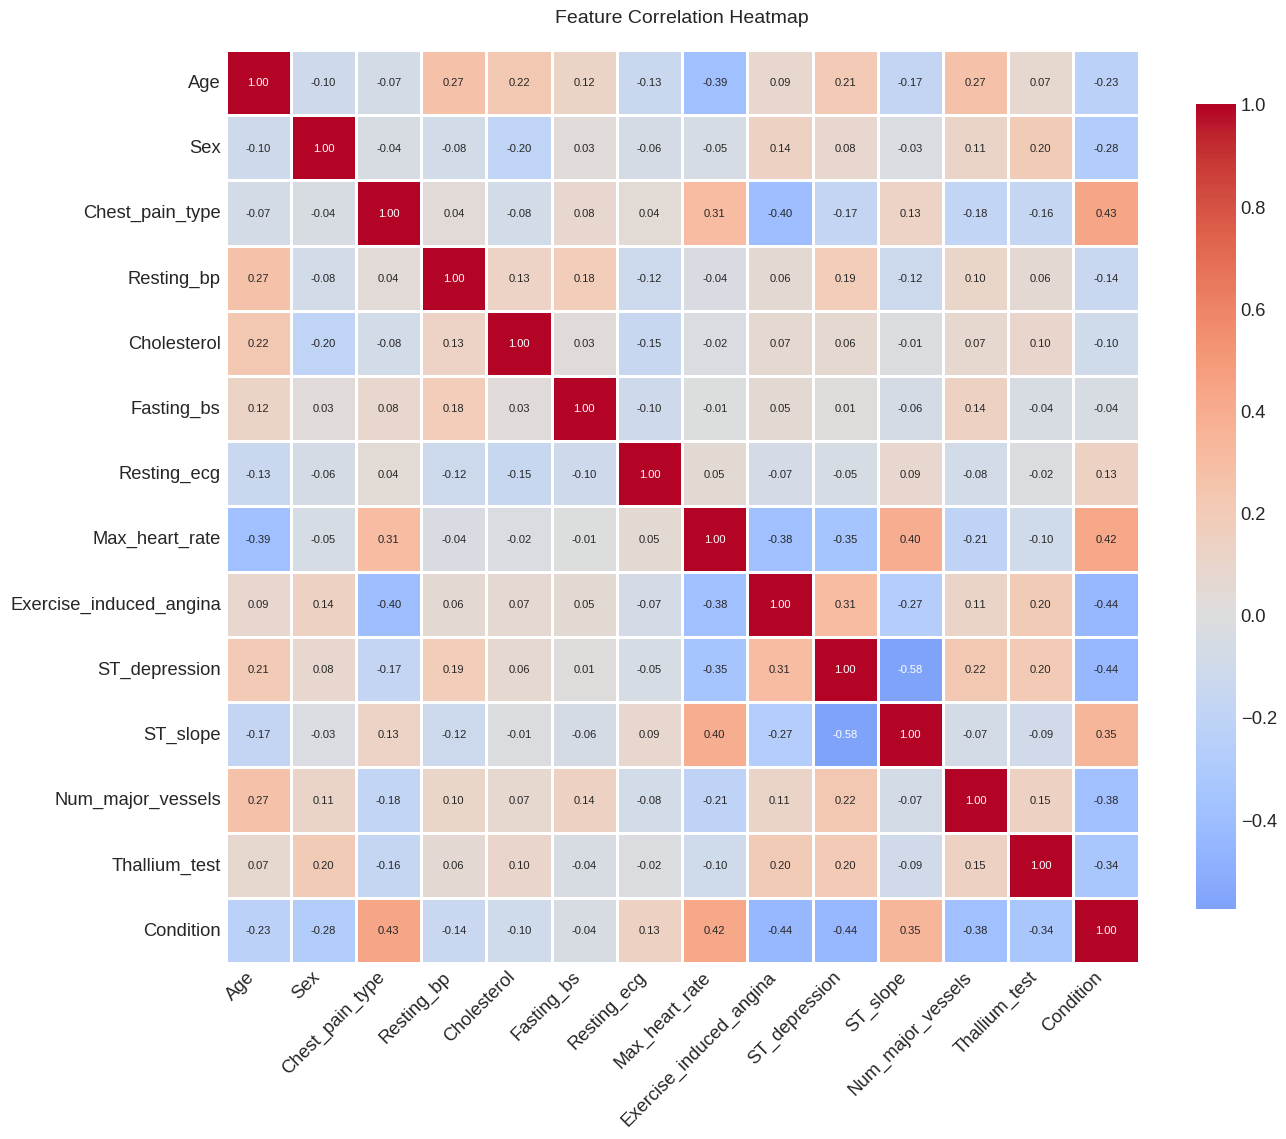


Top 5 features correlated with Heart Disease:
Condition          1.000000
Chest_pain_type    0.434854
Max_heart_rate     0.422895
ST_slope           0.345512
Resting_ecg        0.134468
Name: Condition, dtype: float64

Variance Inflation Factors:
                    Feature        VIF
3                Resting_bp  57.978546
7            Max_heart_rate  47.110371
0                       Age  38.882441
4               Cholesterol  26.208367
12            Thallium_test  17.183907
10                 ST_slope   9.990892
13                Condition   4.108633
1                       Sex   3.792920
9             ST_depression   3.182085
2           Chest_pain_type   2.566095
8   Exercise_induced_angina   2.111290
6               Resting_ecg   2.073125
11        Num_major_vessels   1.960731
5                Fasting_bs   1.272173

Statistical Test Results:
                         correlation       p_value
Age                        -0.240326  6.221261e-15
Sex                        -0.279501  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def load_and_preprocess_data(file_path):
    # Read the data with more explicit error handling
    try:
        df = pd.read_csv(file_path)
        # Rename columns for clarity
        df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
                     'Fasting_bs', 'Resting_ecg', 'Max_heart_rate', 'Exercise_induced_angina',
                     'ST_depression', 'ST_slope', 'Num_major_vessels', 'Thallium_test', 'Condition']
        return df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

def create_correlation_heatmap(df):
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Create figure with specified size ratio
    plt.figure(figsize=(14, 12))

    # Create heatmap with improved styling
    sns.heatmap(corr_matrix,
                annot=True,                # Show correlation values
                cmap='coolwarm',           # Red-blue diverging colormap
                center=0,                  # Center the colormap at 0
                fmt='.2f',                # Format numbers to 2 decimal places
                square=True,              # Make cells square
                linewidths=1,             # Add lines between cells
                cbar_kws={'shrink': .8},  # Adjust colorbar size
                annot_kws={'size': 8})    # Adjust annotation text size

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Add title with proper spacing
    plt.title('Feature Correlation Heatmap', pad=20, size=14)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return corr_matrix

def analyze_target_correlations(df, corr_matrix):
    # Same as before, but with improved formatting
    target_corr = corr_matrix['Condition'].sort_values(ascending=False)
    return target_corr

def calculate_vif(df):
    # Calculate VIF only for numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i)
                       for i in range(numeric_df.shape[1])]

    return vif_data.sort_values('VIF', ascending=False)

def perform_statistical_tests(df):
    results = {}
    target = df['Condition']

    for column in df.columns:
        if column != 'Condition':
            correlation, p_value = stats.spearmanr(df[column], target)
            results[column] = {
                'correlation': correlation,
                'p_value': p_value
            }

    return pd.DataFrame(results).T

def main():
    # Load and preprocess data
    df = load_and_preprocess_data('Heart Disease Dataset.csv')

    if df is not None:
        # Generate correlation heatmap
        corr_matrix = create_correlation_heatmap(df)
        plt.show()

        # Calculate and display additional analyses
        target_correlations = analyze_target_correlations(df, corr_matrix)
        print("\nTop 5 features correlated with Heart Disease:")
        print(target_correlations.head())

        vif_data = calculate_vif(df)
        print("\nVariance Inflation Factors:")
        print(vif_data)

        statistical_tests = perform_statistical_tests(df)
        print("\nStatistical Test Results:")
        print(statistical_tests)
    else:
        print("Analysis could not be completed due to data loading error.")

if __name__ == "__main__":
    main()

Variance Inflation Factor measures with p-value table and comapring to Correlation Heatmap of dataset using PLOTLY. (for different visualization and interactive datapoints.

Enhanced PLOTLY Variance Inflation Factors graphs of feauture importance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def load_and_preprocess_data(file_path):
    """
    Load and preprocess the heart disease dataset with appropriate handling of
    features and data cleaning steps.
    """
    # Read the dataset
    df = pd.read_csv(file_path)

    # Rename columns for better readability
    column_mapping = {
        'trestbps': 'Resting_bp',
        'thalach': 'Max_heart_rate',
        'cp': 'Chest_pain_type',
        'oldpeak': 'ST_depression',
        'slope': 'ST_slope',
        'thal': 'Thallium_test',
        'chol': 'Cholesterol',
        'exang': 'Exercise_induced_angina',
        'ca': 'Num_major_vessels',
        'fbs': 'Fasting_bs'
    }
    df = df.rename(columns=column_mapping)

    # Handle missing values if any
    df = df.replace('?', np.nan)
    df = df.apply(pd.to_numeric, errors='coerce')

    # For this dataset, we'll use simple mean imputation for numerical features
    df = df.fillna(df.mean())

    return df

def calculate_vif(df):
    """
    Calculate Variance Inflation Factor for all features.
    Returns sorted VIF scores.
    """
    # Create a dataframe with feature names and VIF scores
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(df.shape[1])]

    return vif_data.sort_values('VIF', ascending=False)

def create_vif_plot(vif_data):
    """
    Create an interactive VIF plot using Plotly.
    """
    fig = go.Figure()

    # Add bar plot for VIF scores
    fig.add_trace(go.Bar(
        x=vif_data['Feature'],
        y=vif_data['VIF'],
        marker_color=['red' if x > 5 else 'green' for x in vif_data['VIF']],
        text=vif_data['VIF'].round(2),
        textposition='auto',
    ))

    # Update layout
    fig.update_layout(
        title='Variance Inflation Factors (VIF) for Features',
        xaxis_title='Features',
        yaxis_title='VIF Score',
        yaxis_type='log',  # Using log scale due to wide range of values
        showlegend=False,
        height=600,
        xaxis_tickangle=-45
    )

    return fig

def create_correlation_plot(df):
    """
    Create correlation heatmap using Plotly.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        text=np.round(corr_matrix, 2),
        texttemplate='%{text}',
        textfont={"size": 10},
        hoverongaps=False
    ))

    # Update layout
    fig.update_layout(
        title='Feature Correlation Heatmap',
        height=800,
        width=800,
        xaxis_tickangle=-45
    )

    return fig

def create_statistical_test_plot(statistical_data):
    """
    Create plot for statistical test results using Plotly.
    """
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add correlation bars
    fig.add_trace(
        go.Bar(
            x=statistical_data.index,
            y=statistical_data['correlation'],
            name="Correlation",
            marker_color=['red' if x < 0 else 'green'
                         for x in statistical_data['correlation']]
        ),
        secondary_y=False
    )

    # Add -log10(p-value) scatter plot
    fig.add_trace(
        go.Scatter(
            x=statistical_data.index,
            y=-np.log10(statistical_data['p_value']),
            name="-log10(p-value)",
            mode='markers',
            marker=dict(size=10)
        ),
        secondary_y=True
    )

    # Update layout
    fig.update_layout(
        title='Feature Correlations and Statistical Significance',
        xaxis_title='Features',
        height=600,
        xaxis_tickangle=-45
    )

    # Update y-axes labels
    fig.update_yaxes(title_text="Correlation Coefficient", secondary_y=False)
    fig.update_yaxes(title_text="-log10(p-value)", secondary_y=True)

    return fig

def main():
    # Load and preprocess data
    df = load_and_preprocess_data('Heart Disease Dataset.csv')

    # Calculate VIF scores
    vif_data = calculate_vif(df.drop('target', axis=1))  # Exclude target variable

    # Create VIF plot
    vif_fig = create_vif_plot(vif_data)
    vif_fig.show()

    # Create correlation plot
    corr_fig = create_correlation_plot(df)
    corr_fig.show()

    # Create statistical test plot using the provided data
    statistical_data = pd.DataFrame({
        'correlation': {
            'Age': -0.240326,
            'Sex': -0.279501,
            'Chest_pain_type': 0.464894,
            'Resting_bp': -0.115009,
            'Cholesterol': -0.132926,
            'Fasting_bs': -0.041164,
            'Resting_ecg': 0.147402,
            'Max_heart_rate': 0.429832,
            'Exercise_induced_angina': -0.438029,
            'ST_depression': -0.437669,
            'ST_slope': 0.368808,
            'Num_major_vessels': -0.453329,
            'Thallium_test': -0.398973
        },
        'p_value': {
            'Age': 6.221261e-15,
            'Sex': 7.523831e-20,
            'Chest_pain_type': 4.312611e-56,
            'Resting_bp': 2.243838e-4,
            'Cholesterol': 1.959428e-5,
            'Fasting_bs': 1.878967e-1,
            'Resting_ecg': 2.144375e-6,
            'Max_heart_rate': 2.429945e-47,
            'Exercise_induced_angina': 2.694932e-49,
            'ST_depression': 3.292667e-49,
            'ST_slope': 2.235223e-34,
            'Num_major_vessels': 4.314066e-53,
            'Thallium_test': 1.902988e-40
        }
    })

    stats_fig = create_statistical_test_plot(statistical_data)
    stats_fig.show()

if __name__ == "__main__":
    main()

PLOTLY-based interactive scatter VArianc Inflation Scatterplot graph.

In [ ]:
!pip install plotly

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def calculate_vif(data):
    """
    Calculate VIF for all features in the dataset.
    Returns a sorted DataFrame with VIF scores.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                       for i in range(data.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def identify_collinearity_groups(data, vif_threshold=5):
    """
    Separate features into high and low VIF groups.
    Returns two DataFrames containing the respective features.
    """
    vif_scores = calculate_vif(data)

    # Separate features based on VIF threshold
    high_vif_features = vif_scores[vif_scores['VIF'] > vif_threshold]['Feature'].tolist()
    low_vif_features = vif_scores[vif_scores['VIF'] <= vif_threshold]['Feature'].tolist()

    return high_vif_features, low_vif_features

def create_correlation_plots(data, feature1, feature2, high_vif=True):
    """
    Create scatter plot comparing two features.
    """
    fig = go.Figure()

    # Add scatter plot
    fig.add_trace(go.Scatter(
        x=data[feature1],
        y=data[feature2],
        mode='markers',
        marker=dict(
            color='blue',
            size=8,
            opacity=0.6
        ),
        name='Data Points'
    ))

    # Add trend line
    z = np.polyfit(data[feature1], data[feature2], 1)
    p = np.poly1d(z)
    x_range = np.linspace(data[feature1].min(), data[feature1].max(), 100)

    fig.add_trace(go.Scatter(
        x=x_range,
        y=p(x_range),
        mode='lines',
        line=dict(color='lightblue', width=2),
        name='Trend Line'
    ))

    # Update layout
    title = "Correlated Inputs (High VIF)" if high_vif else "Uncorrelated Inputs (Low VIF)"
    fig.update_layout(
        title=title,
        xaxis_title=feature1,
        yaxis_title=feature2,
        showlegend=False,
        width=600,
        height=400
    )

    return fig

def main():
    # Load the dataset
    df = pd.read_csv('Heart Disease Dataset.csv')

    # Select numerical columns for analysis
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    data = df[numerical_cols]

    # Calculate VIF scores
    vif_scores = calculate_vif(data)
    print("\nVariance Inflation Factors:")
    print(vif_scores)

    # Identify high and low VIF features
    high_vif_features, low_vif_features = identify_collinearity_groups(data)

    # Create comparison plots
    # For high VIF features (taking first two as example)
    if len(high_vif_features) >= 2:
        high_vif_plot = create_correlation_plots(
            data,
            high_vif_features[0],
            high_vif_features[1],
            high_vif=True
        )
        high_vif_plot.show()

    # For low VIF features (taking first two as example)
    if len(low_vif_features) >= 2:
        low_vif_plot = create_correlation_plots(
            data,
            low_vif_features[0],
            low_vif_features[1],
            high_vif=False
        )
        low_vif_plot.show()

    # Create side-by-side comparison using subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Uncorrelated Inputs (Low VIF)", "Correlated Inputs (High VIF)")
    )

    # Add low VIF comparison
    if len(low_vif_features) >= 2:
        fig.add_trace(
            go.Scatter(
                x=data[low_vif_features[0]],
                y=data[low_vif_features[1]],
                mode='markers',
                marker=dict(color='blue', size=8, opacity=0.6)
            ),
            row=1, col=1
        )

        # Add trend line
        z = np.polyfit(data[low_vif_features[0]], data[low_vif_features[1]], 1)
        p = np.poly1d(z)
        x_range = np.linspace(data[low_vif_features[0]].min(),
                            data[low_vif_features[0]].max(), 100)
        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=p(x_range),
                mode='lines',
                line=dict(color='lightblue', width=2)
            ),
            row=1, col=1
        )

    # Add high VIF comparison
    if len(high_vif_features) >= 2:
        fig.add_trace(
            go.Scatter(
                x=data[high_vif_features[0]],
                y=data[high_vif_features[1]],
                mode='markers',
                marker=dict(color='blue', size=8, opacity=0.6)
            ),
            row=1, col=2
        )

        # Add trend line
        z = np.polyfit(data[high_vif_features[0]], data[high_vif_features[1]], 1)
        p = np.poly1d(z)
        x_range = np.linspace(data[high_vif_features[0]].min(),
                            data[high_vif_features[0]].max(), 100)
        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=p(x_range),
                mode='lines',
                line=dict(color='lightblue', width=2)
            ),
            row=1, col=2
        )

    # Update layout
    fig.update_layout(
        height=400,
        width=1200,
        showlegend=False,
        title_text="Comparison of Feature Correlations"
    )

    fig.show()

if __name__ == "__main__":
    main()


Variance Inflation Factors:
     Feature        VIF
3   trestbps  57.978546
7    thalach  47.110371
0        age  38.882441
4       chol  26.208367
12      thal  17.183907
10     slope   9.990892
13    target   4.108633
1        sex   3.792920
9    oldpeak   3.182085
2         cp   2.566095
8      exang   2.111290
6    restecg   2.073125
11        ca   1.960731
5        fbs   1.272173


VIF plots before and after preprocessing dataset using PLOTLY.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

def preprocess_data(data):
    """
    Comprehensive data preprocessing pipeline including:
    - Handling missing values
    - Removing duplicates
    - Removing outliers
    - Feature scaling
    - Basic feature engineering

    Parameters:
        data (pd.DataFrame): Raw input data

    Returns:
        tuple: (preprocessed_df, preprocessing_report)
    """
    preprocessing_report = {}
    df = data.copy()

    # Initial data state
    preprocessing_report['initial_shape'] = df.shape

    # Step 1: Handle missing values
    missing_before = df.isnull().sum().sum()
    df = df.replace('?', np.nan)  # Replace potential string '?' with NaN
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid values become NaN

    # For numerical columns, use median imputation
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    missing_after = df.isnull().sum().sum()
    preprocessing_report['missing_values'] = {
        'before': missing_before,
        'after': missing_after,
        'handled': missing_before - missing_after
    }

    # Step 2: Remove duplicates
    duplicates_before = df.shape[0]
    df = df.drop_duplicates()
    duplicates_after = df.shape[0]
    preprocessing_report['duplicates_removed'] = duplicates_before - duplicates_after

    # Step 3: Remove outliers using IQR method
    outliers_removed = 0
    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        outliers_removed += outliers_in_column

    preprocessing_report['outliers_removed'] = outliers_removed

    # Step 4: Feature scaling
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Step 5: Basic feature engineering (add interaction terms for numeric features)
    interaction_terms = []
    for i, col1 in enumerate(numerical_cols[:-1]):
        for col2 in numerical_cols[i+1:]:
            interaction_col = f"{col1}_x_{col2}"
            df[interaction_col] = df[col1] * df[col2]
            interaction_terms.append(interaction_col)

    preprocessing_report['interaction_terms_added'] = len(interaction_terms)
    preprocessing_report['final_shape'] = df.shape

    return df, preprocessing_report

def calculate_vif(data):
    """Calculate VIF scores (same as original)"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                       for i in range(data.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def create_vif_comparison_plot(vif_before, vif_after):
    """
    Create a comparison plot showing VIF scores before and after preprocessing.

    Parameters:
        vif_before (pd.DataFrame): VIF scores before preprocessing
        vif_after (pd.DataFrame): VIF scores after preprocessing

    Returns:
        plotly.graph_objects.Figure: Comparison plot
    """
    fig = make_subplots(rows=2, cols=1,
                       subplot_titles=("VIF Scores Before Preprocessing",
                                     "VIF Scores After Preprocessing"))

    # Before preprocessing
    fig.add_trace(
        go.Bar(
            x=vif_before['Feature'],
            y=vif_before['VIF'],
            name='Before',
            marker_color=['red' if x > 5 else 'green' for x in vif_before['VIF']]
        ),
        row=1, col=1
    )

    # After preprocessing
    fig.add_trace(
        go.Bar(
            x=vif_after['Feature'],
            y=vif_after['VIF'],
            name='After',
            marker_color=['red' if x > 5 else 'green' for x in vif_after['VIF']]
        ),
        row=2, col=1
    )

    fig.update_layout(height=800, title_text="VIF Comparison Before vs After Preprocessing")
    fig.update_xaxes(tickangle=45)

    return fig

def main():
    # Load the dataset
    df = pd.read_csv('Heart Disease Dataset.csv')

    # Select numerical columns for initial analysis
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    data_before = df[numerical_cols].copy()

    # Calculate initial VIF scores
    print("\nVIF Scores Before Preprocessing:")
    vif_before = calculate_vif(data_before)
    print(vif_before)

    # Apply preprocessing
    data_after, preprocessing_report = preprocess_data(df)

    # Calculate VIF scores after preprocessing
    print("\nVIF Scores After Preprocessing:")
    vif_after = calculate_vif(data_after)
    print(vif_after)

    # Print preprocessing report
    print("\nPreprocessing Report:")
    for key, value in preprocessing_report.items():
        print(f"{key}: {value}")

    # Create and show VIF comparison plot
    vif_comparison = create_vif_comparison_plot(vif_before, vif_after)
    vif_comparison.show()

    # Create comparison plots for features (using original function)
    high_vif_features, low_vif_features = identify_collinearity_groups(data_after)

    if len(high_vif_features) >= 2 and len(low_vif_features) >= 2:
        # Create side-by-side comparison
        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=("Uncorrelated Inputs (Low VIF)", "Correlated Inputs (High VIF)")
        )

        # Add low VIF comparison
        fig.add_trace(
            go.Scatter(
                x=data_after[low_vif_features[0]],
                y=data_after[low_vif_features[1]],
                mode='markers',
                marker=dict(color='blue', size=8, opacity=0.6),
                name='Low VIF'
            ),
            row=1, col=1
        )

        # Add high VIF comparison
        fig.add_trace(
            go.Scatter(
                x=data_after[high_vif_features[0]],
                y=data_after[high_vif_features[1]],
                mode='markers',
                marker=dict(color='red', size=8, opacity=0.6),
                name='High VIF'
            ),
            row=1, col=2
        )

        # Update layout
        fig.update_layout(
            height=500,
            width=1200,
            title_text="Feature Correlations After Preprocessing"
        )

        fig.show()

if __name__ == "__main__":
    main()


VIF Scores Before Preprocessing:
     Feature        VIF
3   trestbps  57.978546
7    thalach  47.110371
0        age  38.882441
4       chol  26.208367
12      thal  17.183907
10     slope   9.990892
13    target   4.108633
1        sex   3.792920
9    oldpeak   3.182085
2         cp   2.566095
8      exang   2.111290
6    restecg   2.073125
11        ca   1.960731
5        fbs   1.272173

VIF Scores After Preprocessing:
             Feature       VIF
38      sex_x_target  8.814429
89  thalach_x_target  7.741324
90   exang_x_oldpeak  7.033589
94    exang_x_target  7.033118
96      oldpeak_x_ca  6.836928
..               ...       ...
72     fbs_x_oldpeak       NaN
73       fbs_x_slope       NaN
74          fbs_x_ca       NaN
75        fbs_x_thal       NaN
76      fbs_x_target       NaN

[105 rows x 2 columns]

Preprocessing Report:
initial_shape: (1025, 14)
missing_values: {'before': 0, 'after': 0, 'handled': 0}
duplicates_removed: 723
outliers_removed: 74
interaction_terms_added: 91